# AgriWeather_EDA

- ```'../data/Data Collection/AgriWether.ipynb'``` 파일에서 수집한 데이터를 포함하여 EDA하는 파일

In [1]:
import sys
import os
from glob import glob
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

sys.path.append("../Import")
from definitions import crop_list2
from modul import reduce_mem_usage, EDA

root_path = "../"
data_path = f"{root_path}data/"

# 파일 불러오기

In [3]:
df_raw = pd.read_csv(f"{data_path}AgriWeather.csv")
EDA.Check_df(df_raw)



┌▣ df.shape ---- ---- ---- ----
(23368, 9)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YMD                      23368 non-null  object 
 1   Crop_Name                23368 non-null  object 
 2   DayAvg_Temperature       23368 non-null  float64
 3   DayDiff_Temperature      23368 non-null  float64
 4   DayAvg_RelativeHumidity  23368 non-null  float64
 5   DaySum_Rainfall          23368 non-null  float64
 6   DayAvg_WindSpeed         23368 non-null  float64
 7   DaySum_Sunshine          23368 non-null  float64
 8   Warning_Count            23368 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.6+ MB
None


┌▣ df.head() ---- ---- ---- ----


YMD Crop_Name  DayAvg_Temperature  DayDiff_Temperature  \
0  2005-01-01        감자              -3.750                9.250   
1  2005-01-01       고구마              -3.000                8.000   
2  2005-01-01        깻잎              -3.500                8.000   
3  2005-01-01        마늘              -1.200                7.200   
4  2005-01-02        감자              -0.250               10.750   

   DayAvg_RelativeHumidity  DaySum_Rainfall  DayAvg_WindSpeed  \
0                   44.000            0.750             2.250   
1                    0.000            0.000             2.000   
2                   29.000            0.000             1.500   
3                   31.400            1.400             2.200   
4                   48.250            0.000             1.750   

   DaySum_Sunshine  Warning_Count  
0            3.500          0.000  
1            0.000          0.000  
2            4.000          0.000  
3            2.800          0.000  
4            0.500          0.000



┌▣ df.columns.to_list() ---- ---- ---- ----
['YMD', 'Crop_Name', 'DayAvg_Temperature', 'DayDiff_Temperature', 'DayAvg_RelativeHumidity', 'DaySum_Rainfall', 'DayAvg_WindSpeed', 'DaySum_Sunshine', 'Warning_Count']


# 단변량 비시각화 분석

In [4]:
# 분석할 데이터 할당
df = df_raw.copy()
df = df.rename(columns={"Crop_Name":"Product"})
df = reduce_mem_usage(df)

ead = EDA(
    df,
    Product="마늘",
    cheetkey = "AgriWeather"
)

Mem. usage decreased to  0.67 Mb (58.3% reduction)




┌▣ df.describe().T ---- ---- ---- ----


count  mean    std    min    25%    50%    75%  \
DayAvg_Temperature      5842.000   inf  9.172 -8.625  5.000 14.000 21.406   
DayDiff_Temperature     5842.000 9.898  3.254 -3.199  7.602  9.637 12.000   
DayAvg_RelativeHumidity 5842.000   inf 17.562  0.000 42.812 57.812 72.375   
DaySum_Rainfall         5842.000 3.371  9.477  0.000  0.000  0.000  1.800   
DayAvg_WindSpeed        5842.000 1.569  0.813  0.000  1.000  1.400  2.000   
DaySum_Sunshine         5842.000 3.008  2.021  0.000  1.250  3.000  4.602   
Warning_Count           5842.000 0.145  0.262  0.000  0.000  0.000  0.200   

                            max  
DayAvg_Temperature       30.406  
DayDiff_Temperature      22.672  
DayAvg_RelativeHumidity  97.000  
DaySum_Rainfall         157.750  
DayAvg_WindSpeed          6.777  
DaySum_Sunshine           9.500  
Warning_Count             1.000



┌▣ df.describe(include=['O']) ---- ---- ---- ----


YMD Product
count         5842    5842
unique        5842       1
top     2005-01-01      마늘
freq             1    5842



┌▣ df.isna().sum() ---- ---- ---- ----


0
YMD                      0
Product                  0
DayAvg_Temperature       0
DayDiff_Temperature      0
DayAvg_RelativeHumidity  0
DaySum_Rainfall          0
DayAvg_WindSpeed         0
DaySum_Sunshine          0
Warning_Count            0



┌▣ sns.heatmap(data=df.isna()) ---- ---- ---- ----


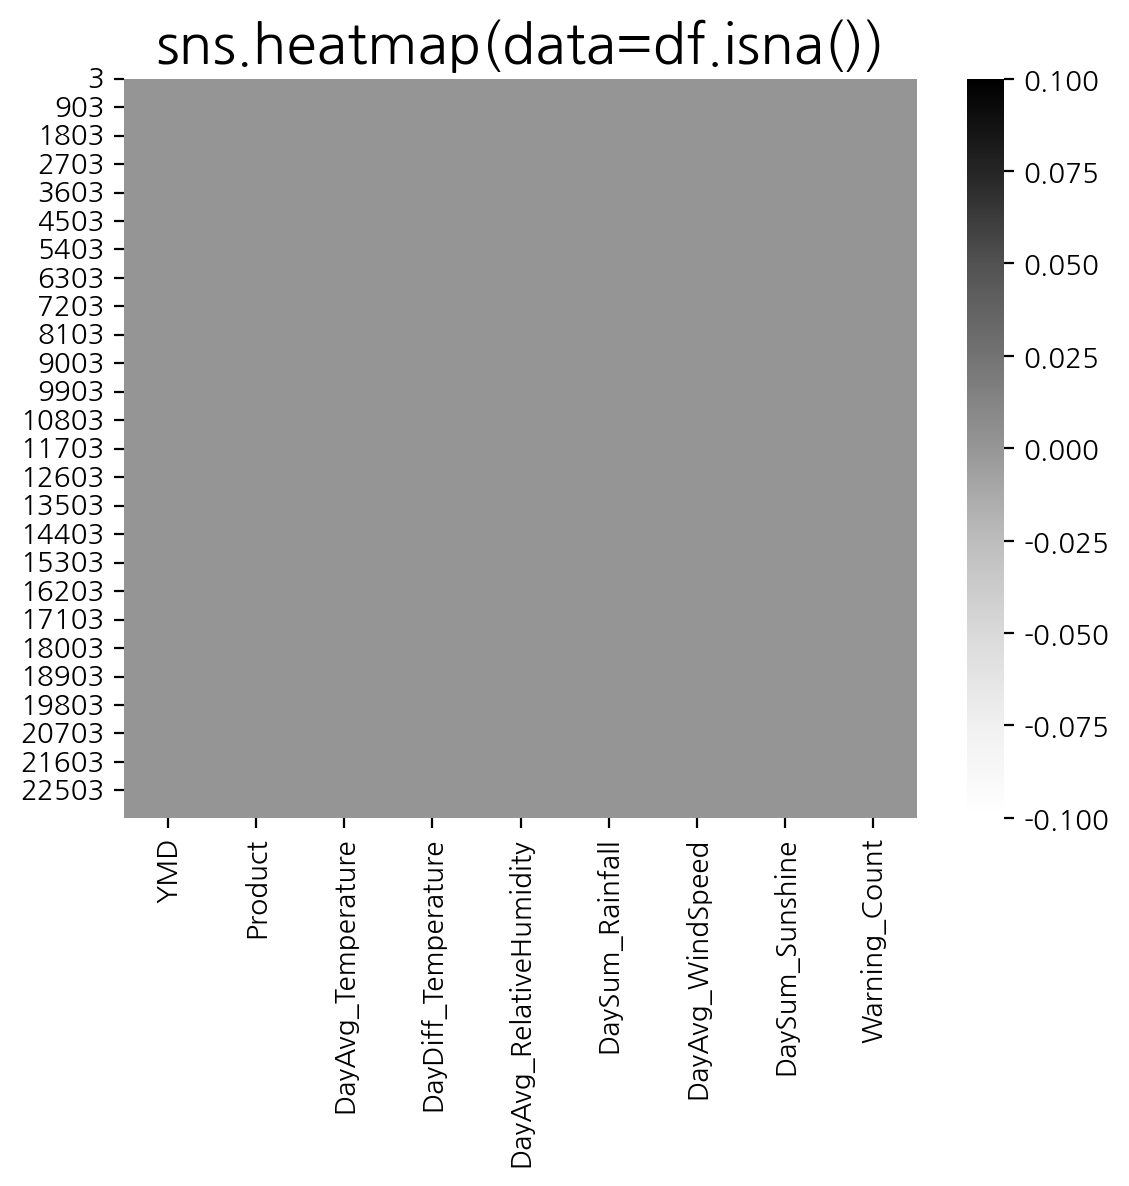



┌▣ df.isna().mean() ---- ---- ---- ----


0
YMD                     0.000
Product                 0.000
DayAvg_Temperature      0.000
DayDiff_Temperature     0.000
DayAvg_RelativeHumidity 0.000
DaySum_Rainfall         0.000
DayAvg_WindSpeed        0.000
DaySum_Sunshine         0.000
Warning_Count           0.000



┌▣ df.hist() ---- ---- ---- ----


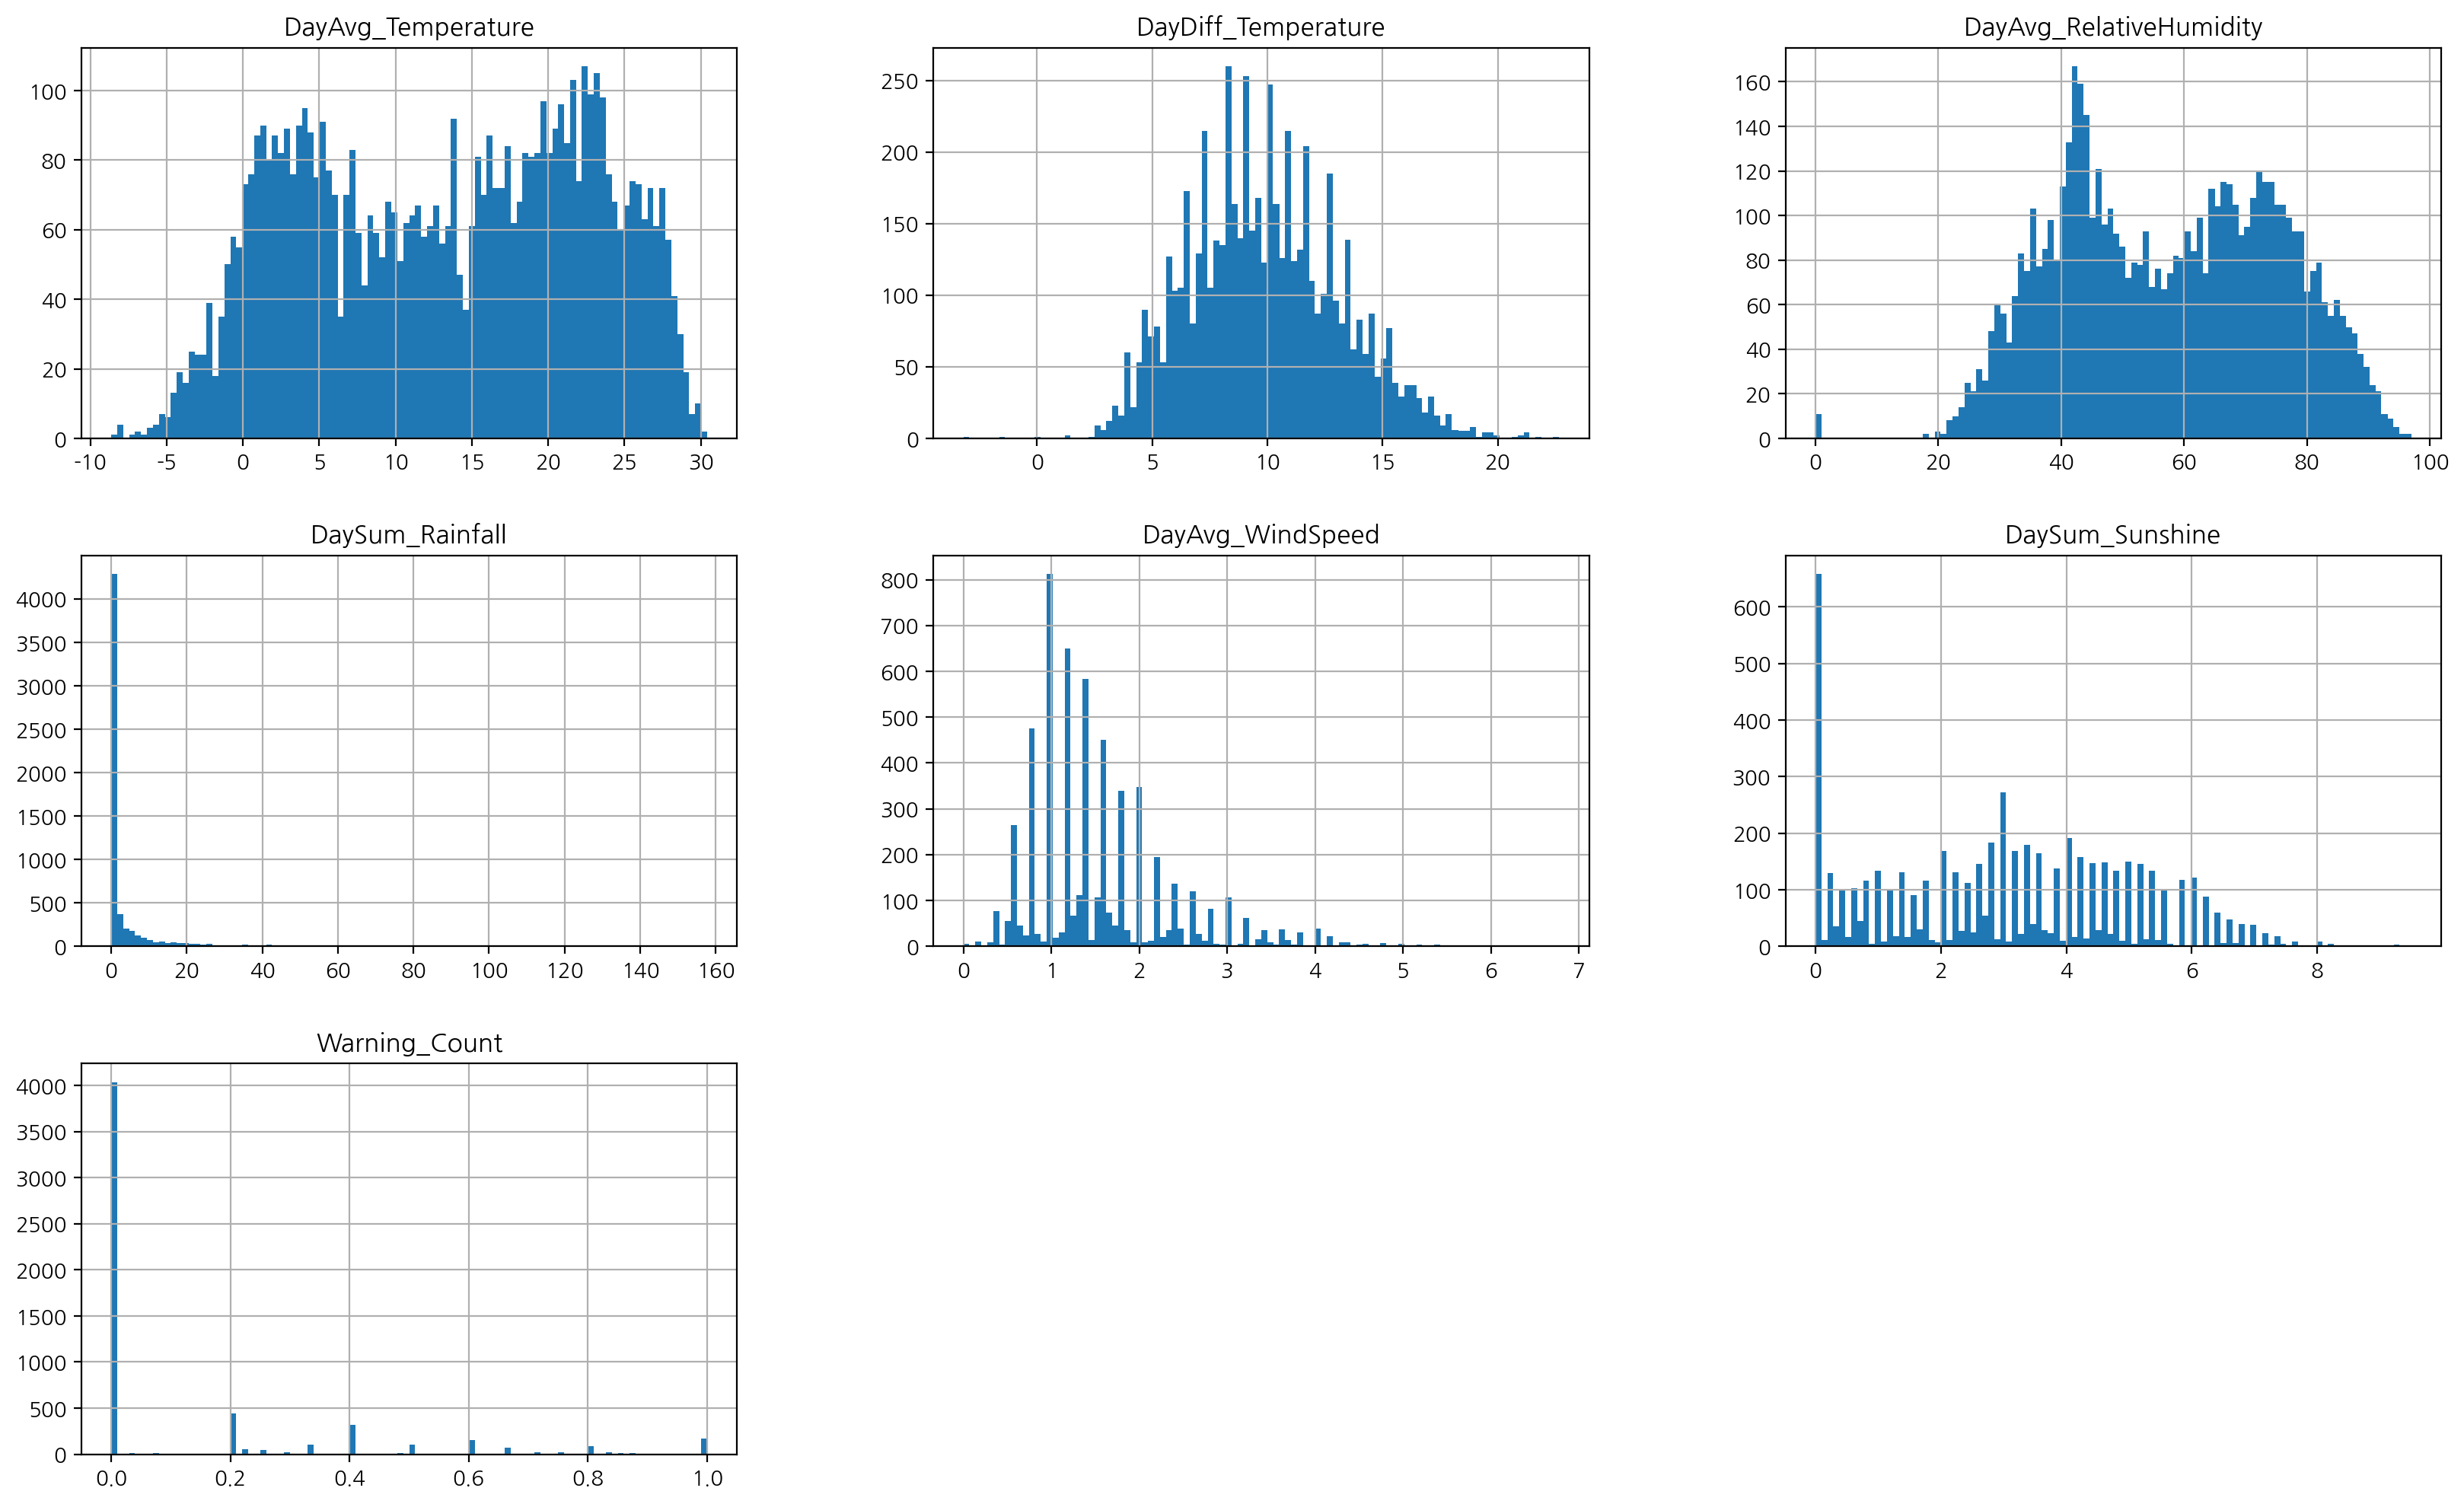



┌▣ df_log1p.hist() ---- ---- ---- ----


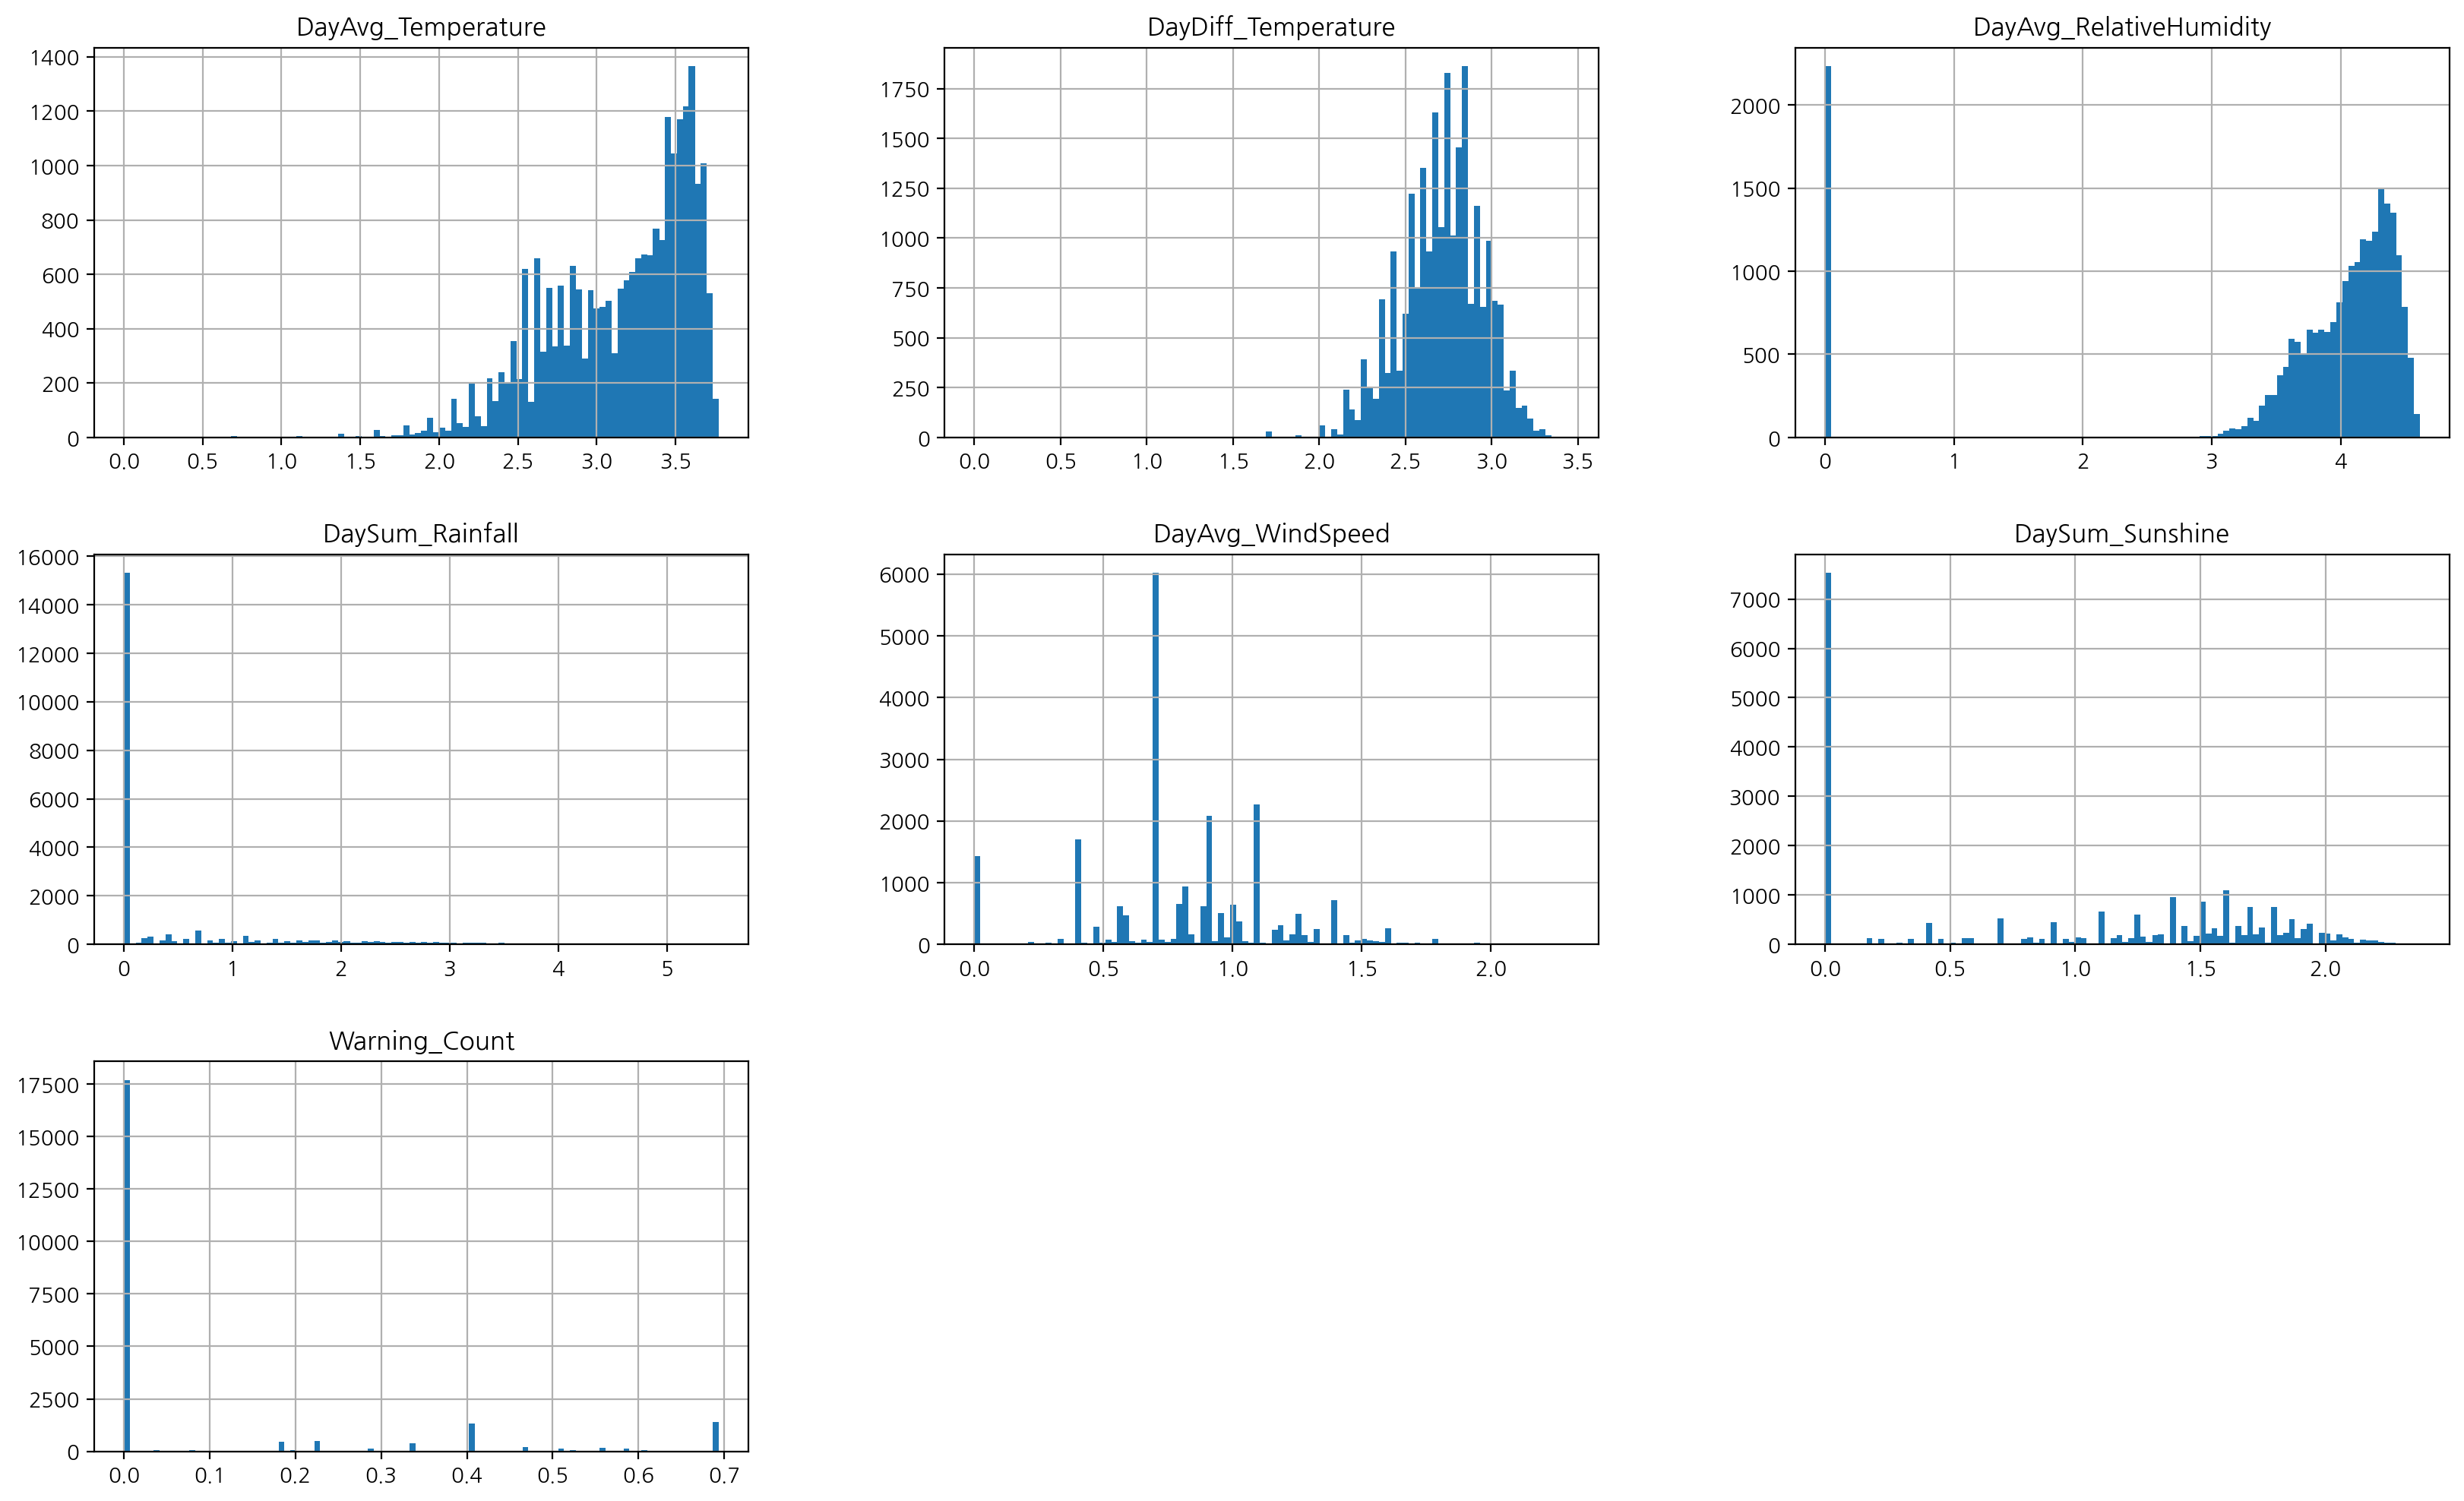



┌▣ df_log1p_robSc.hist() ---- ---- ---- ----


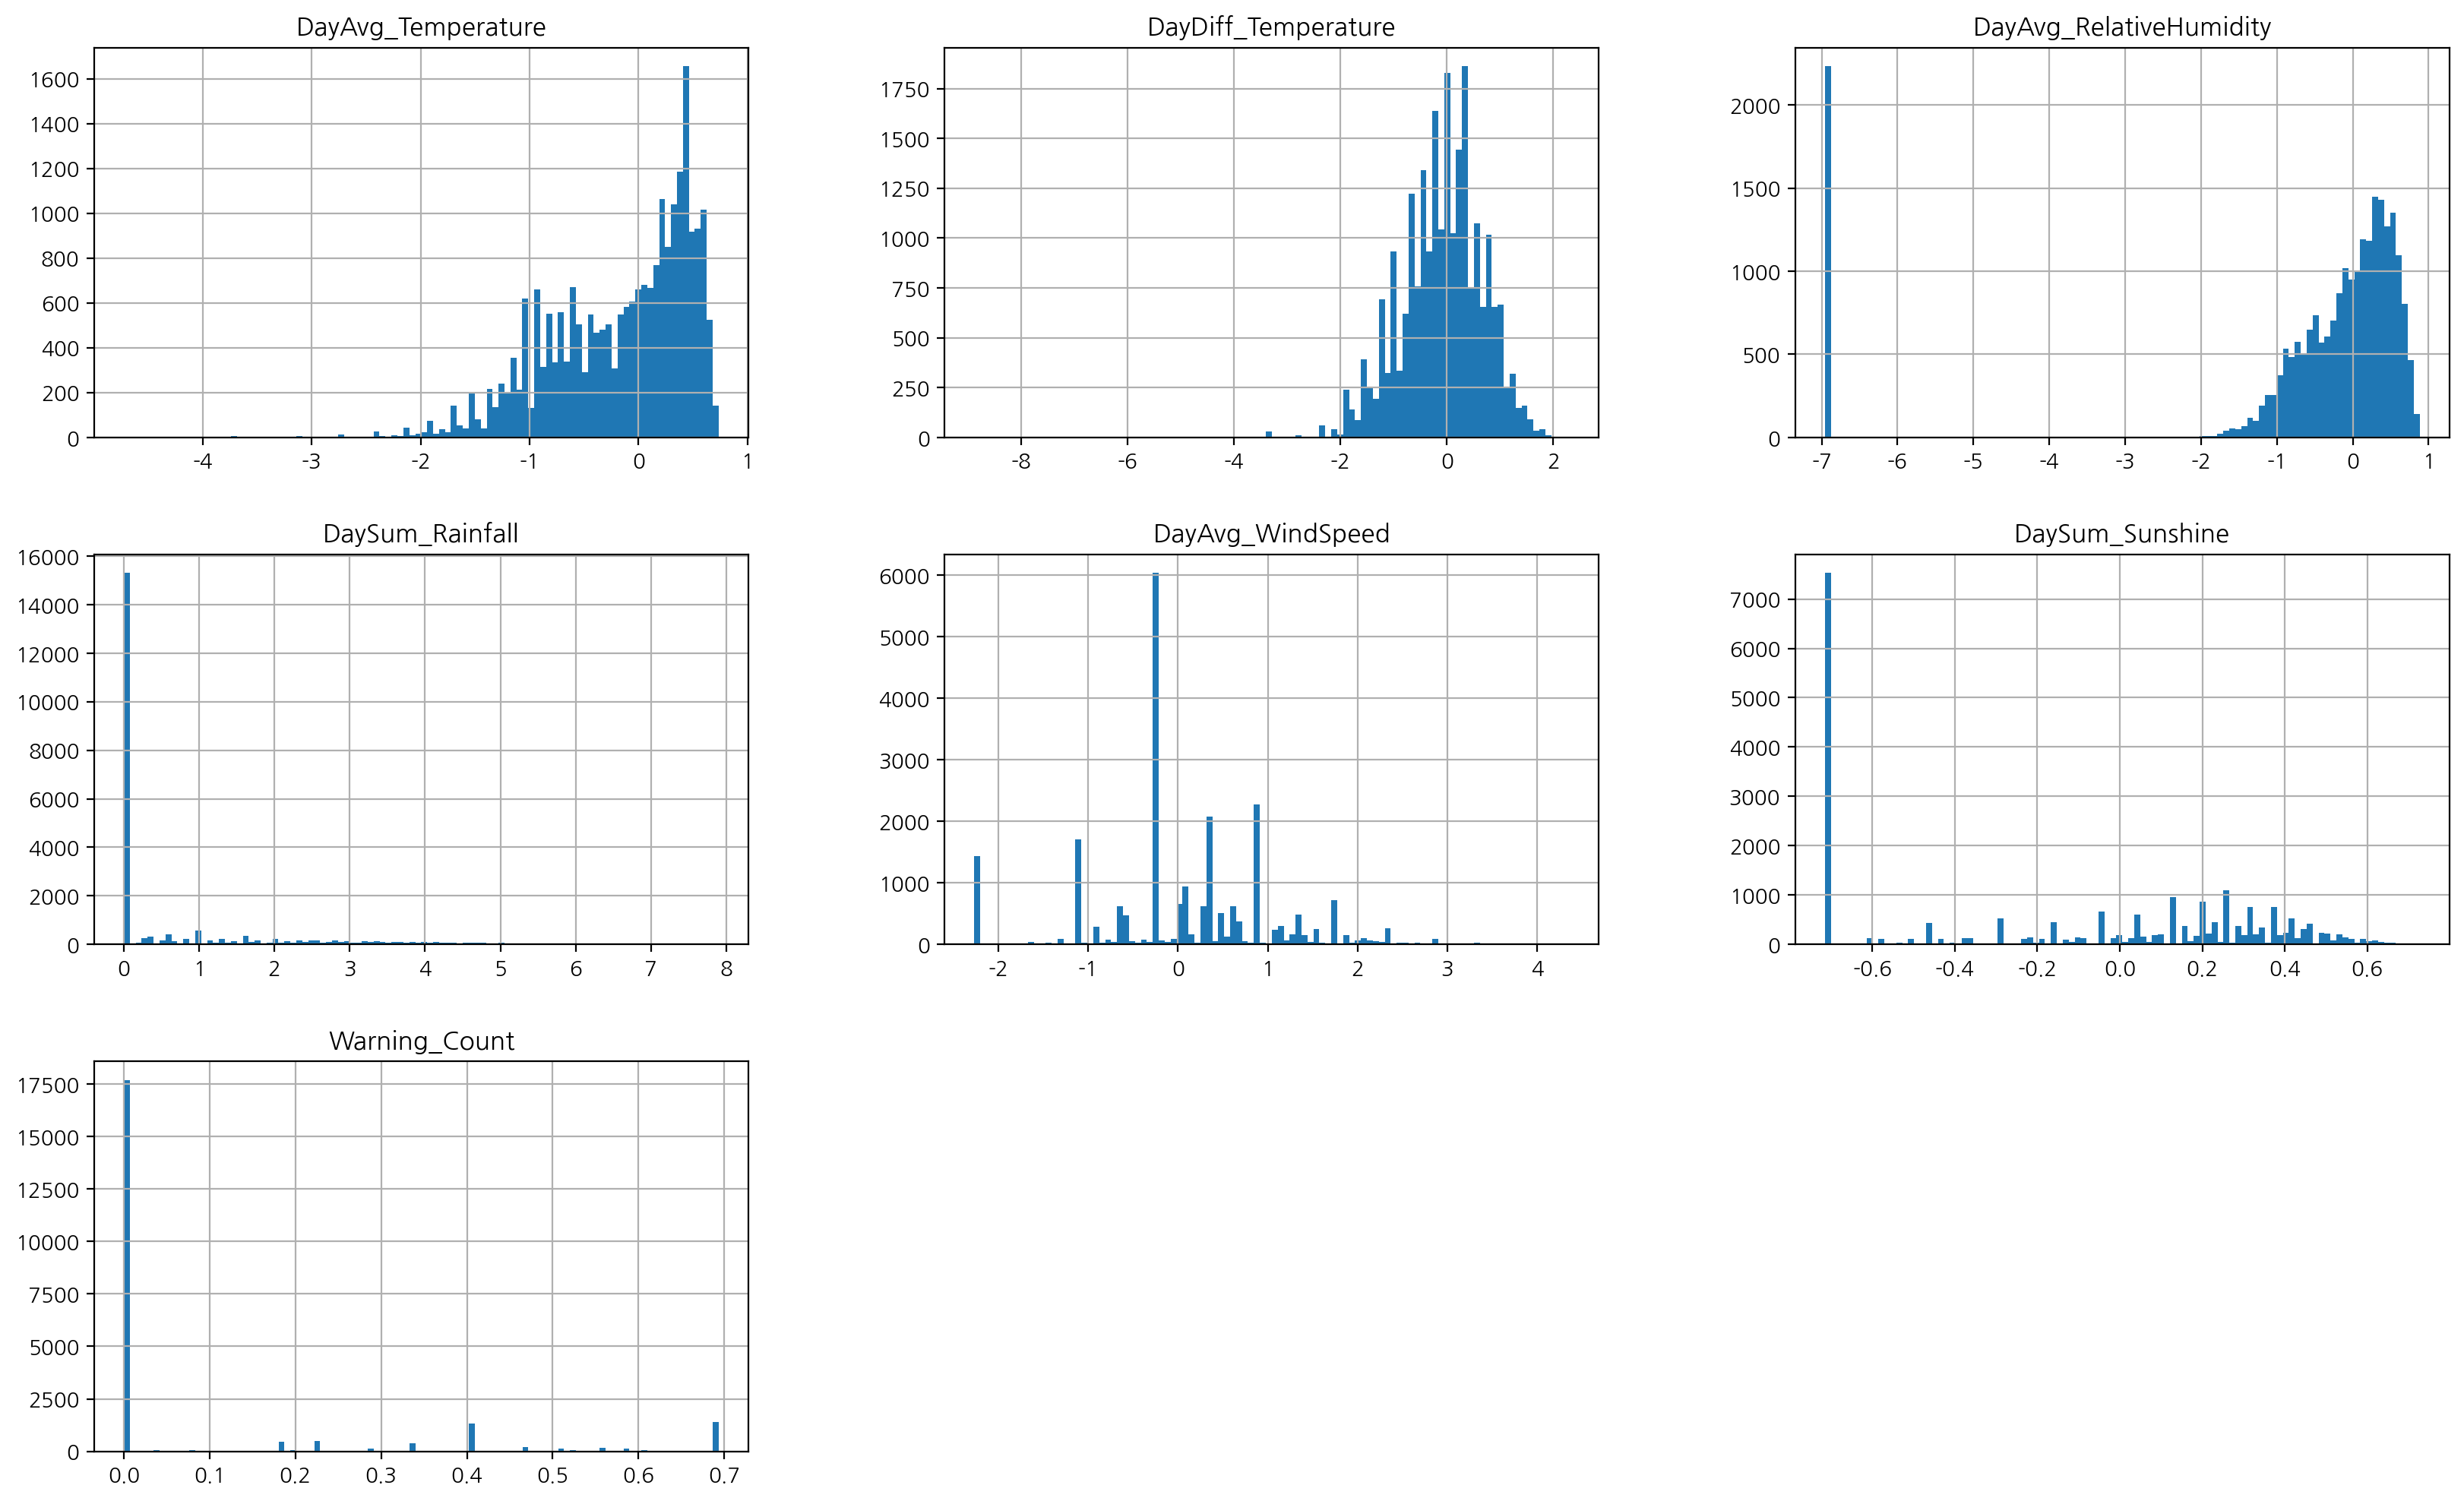

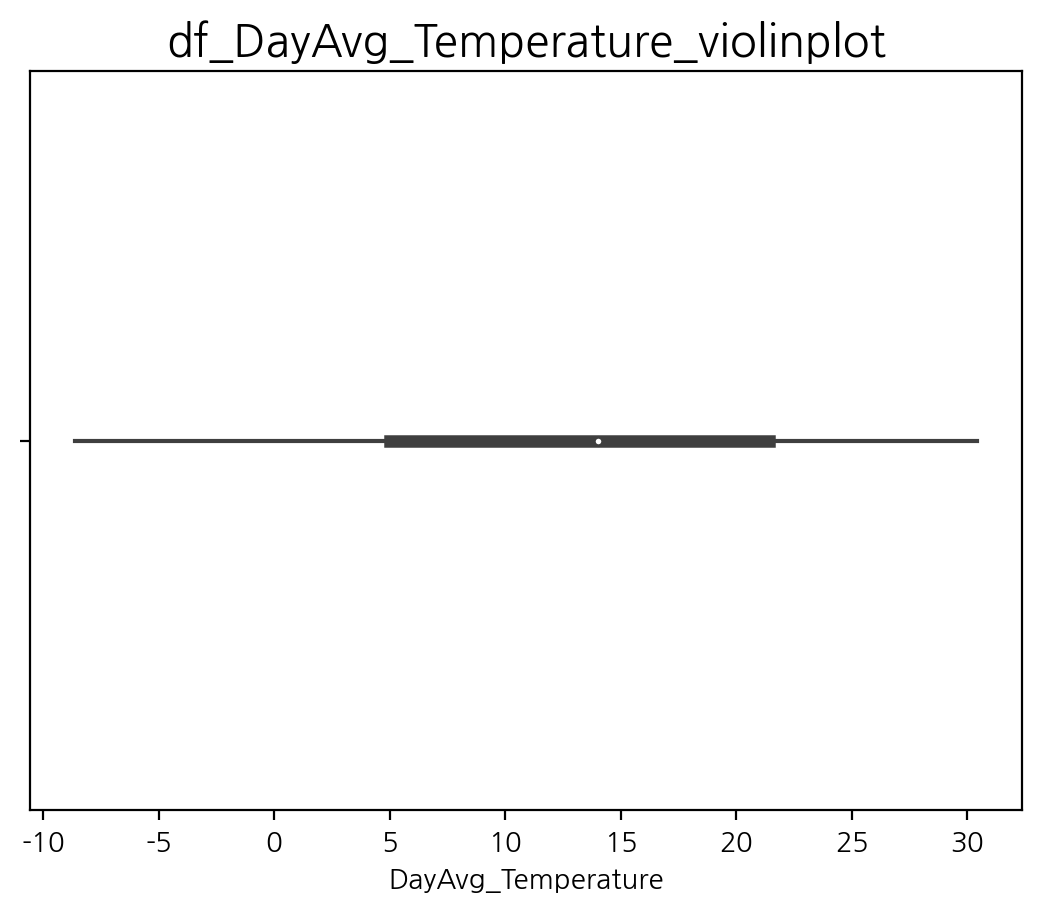

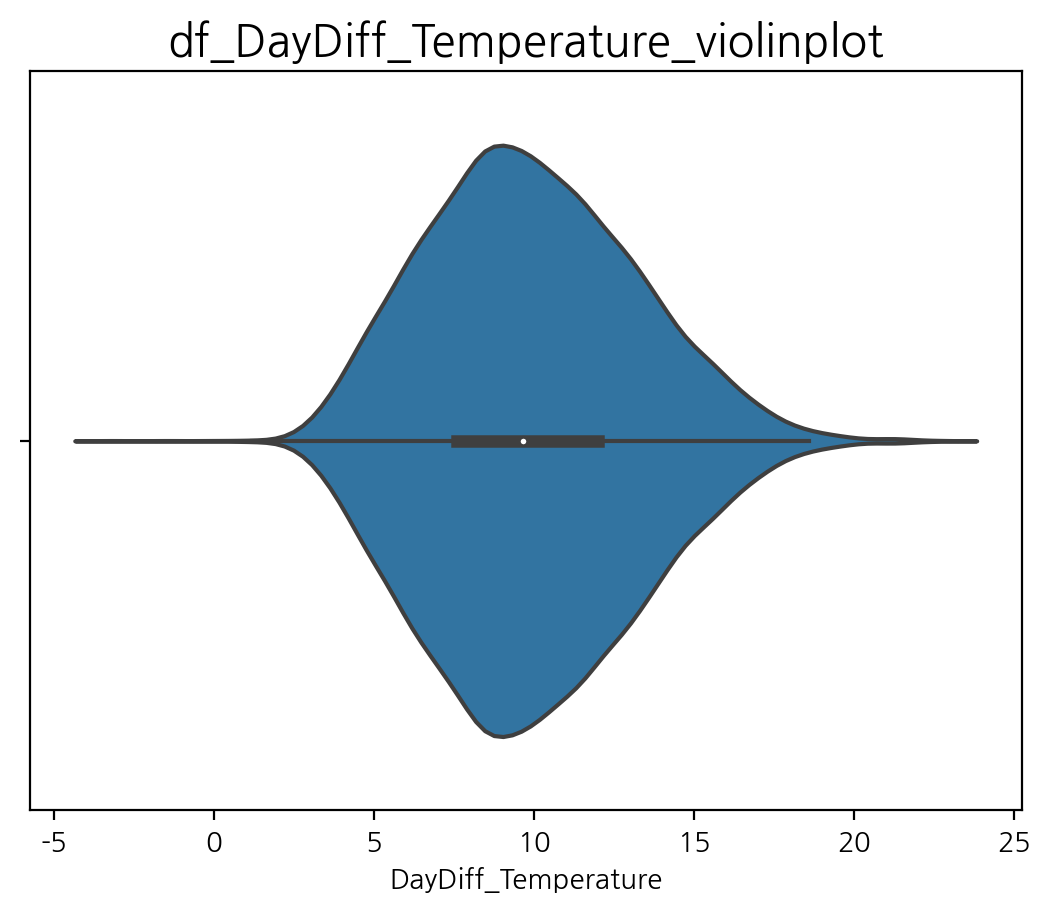

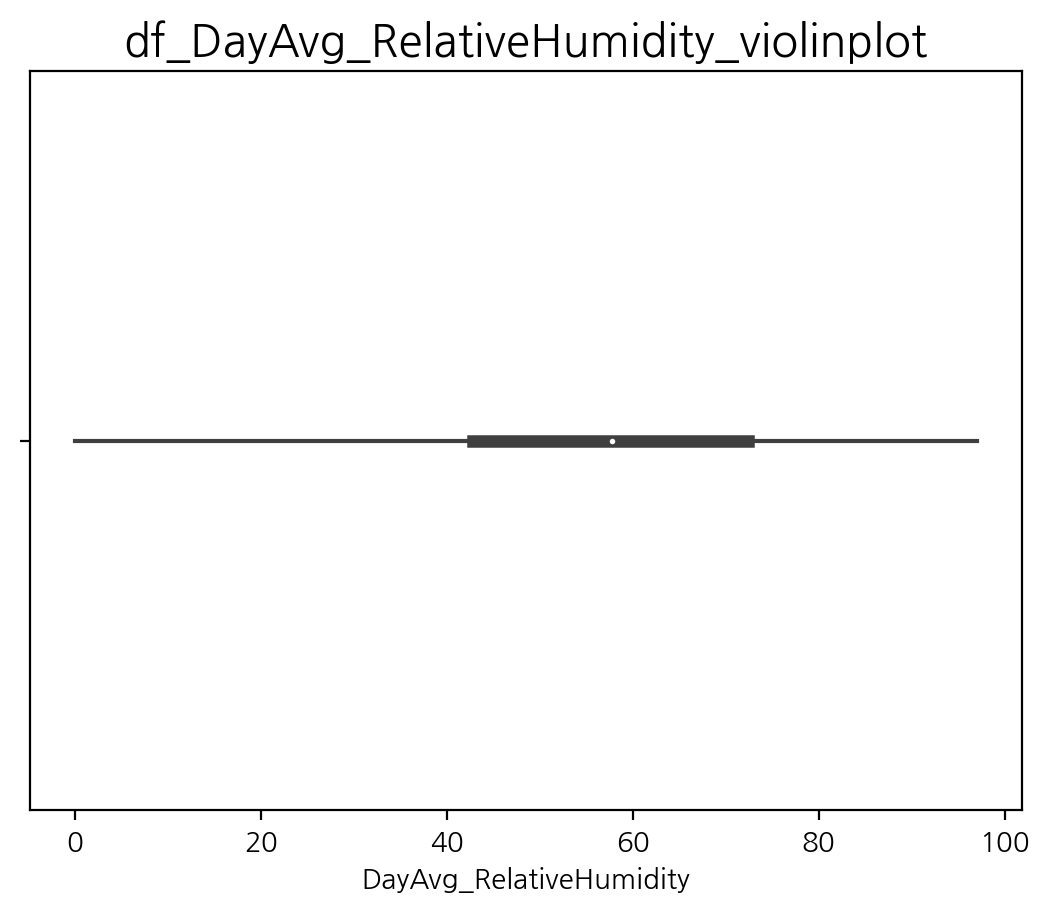

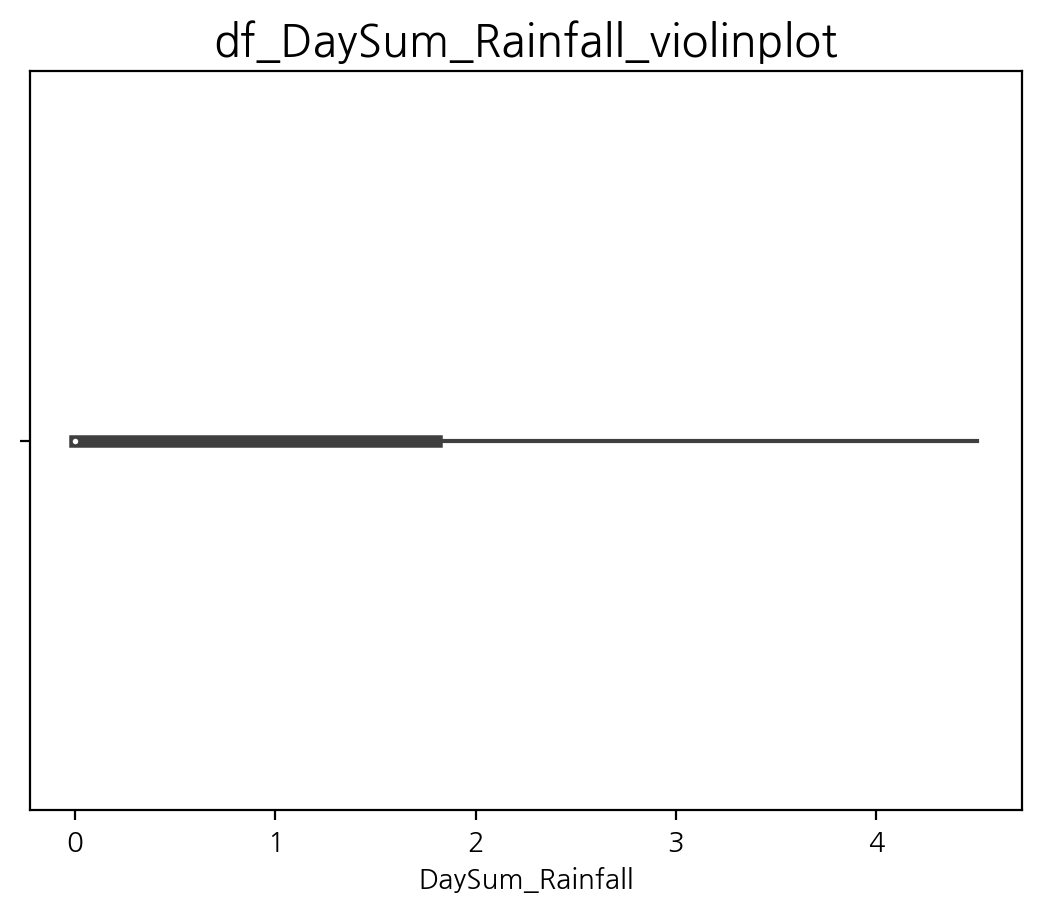

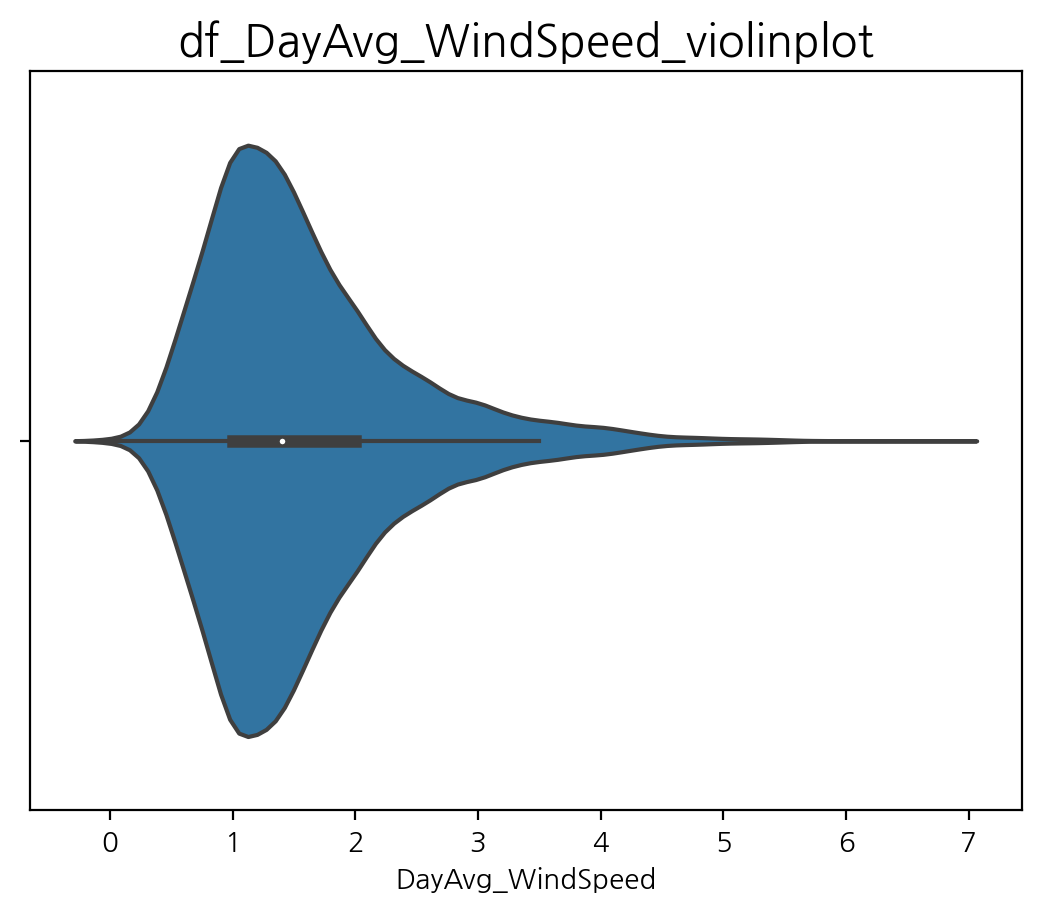

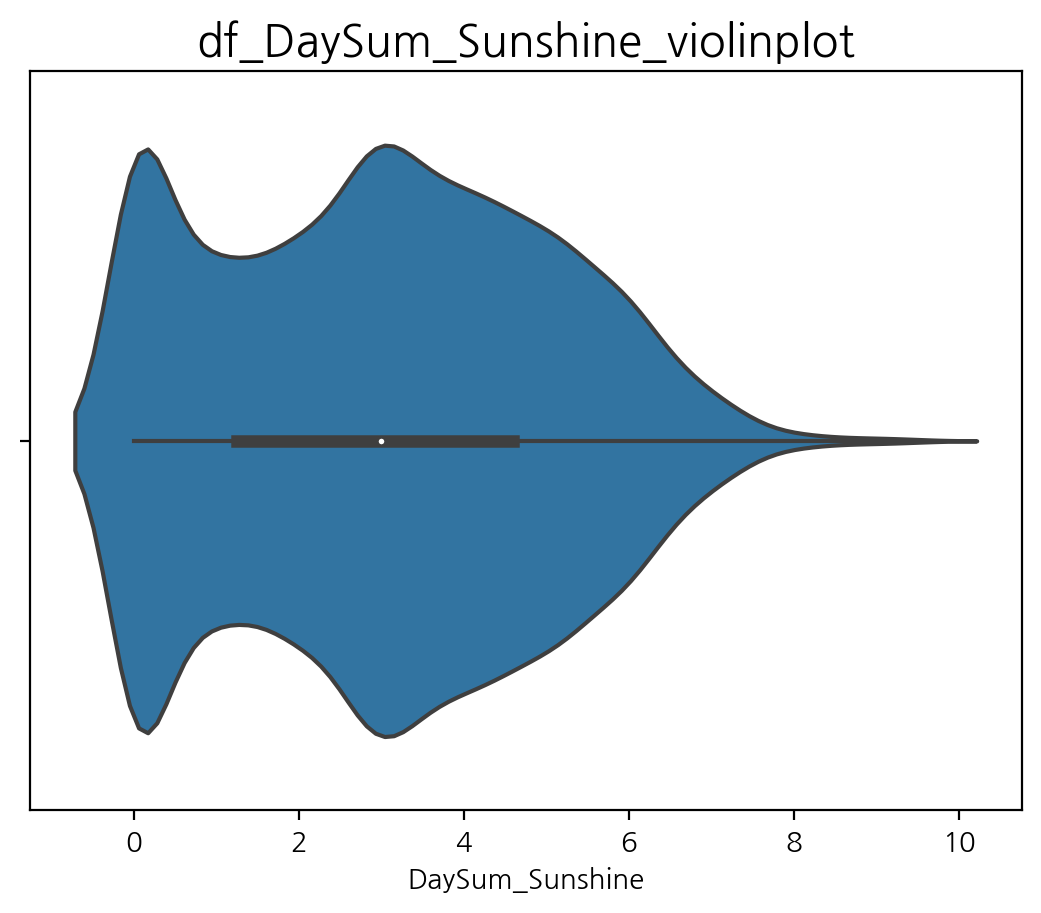

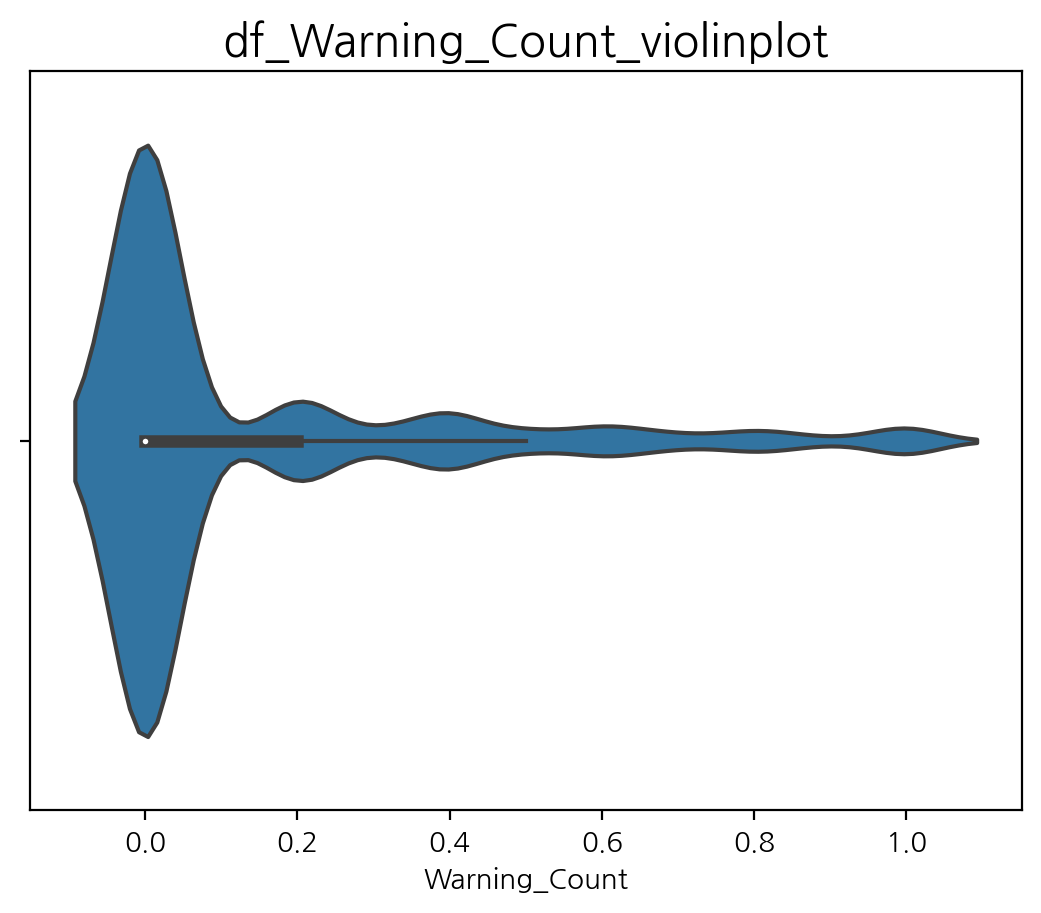

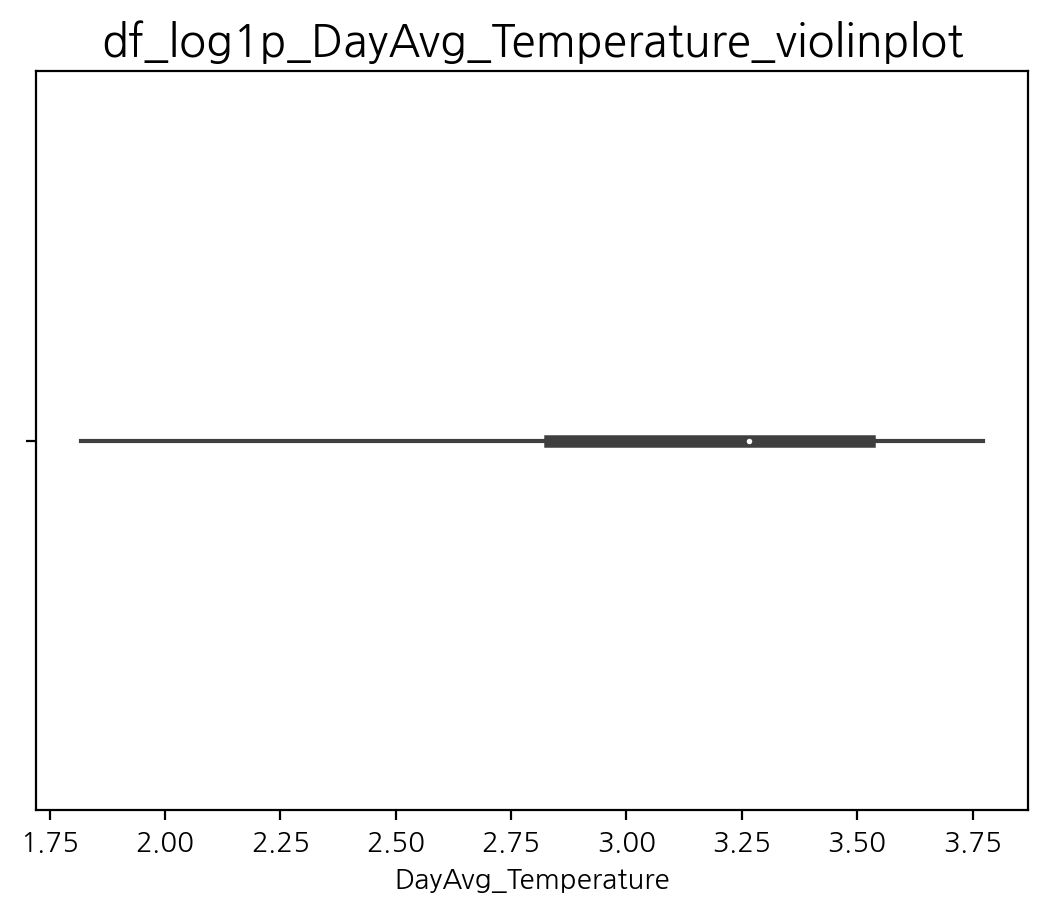

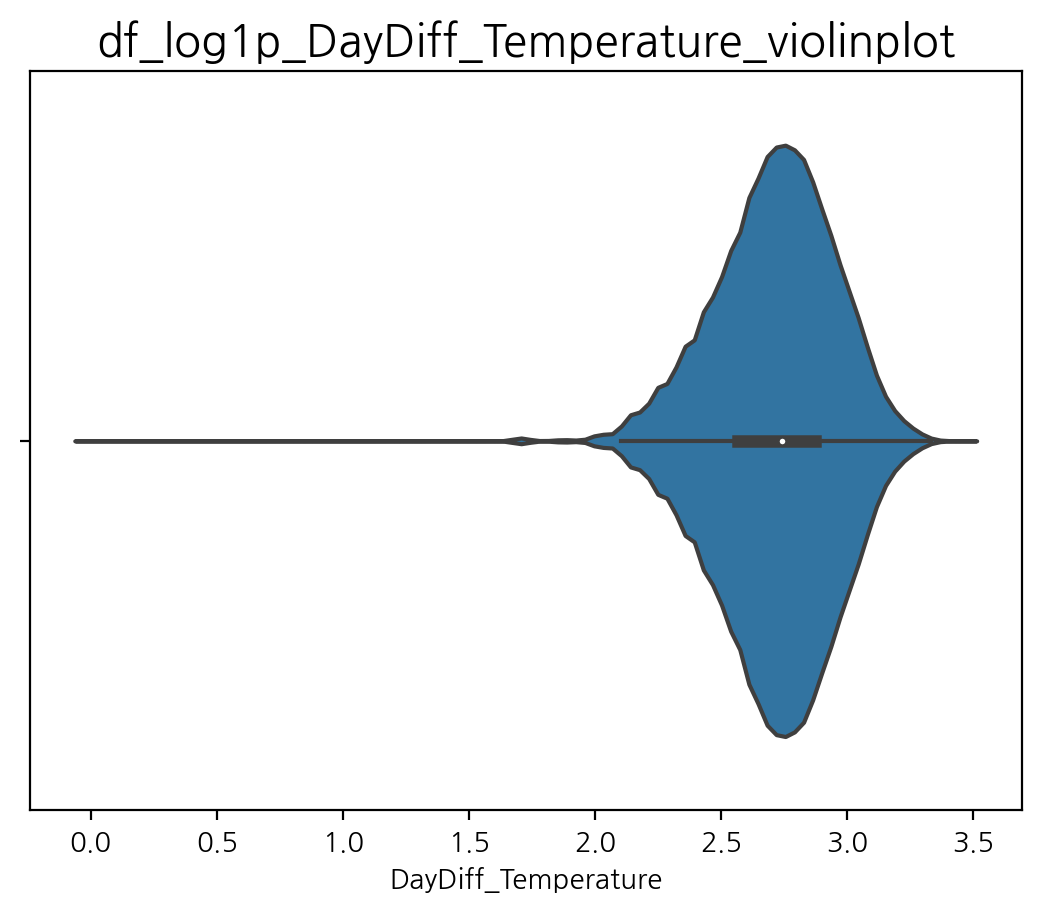

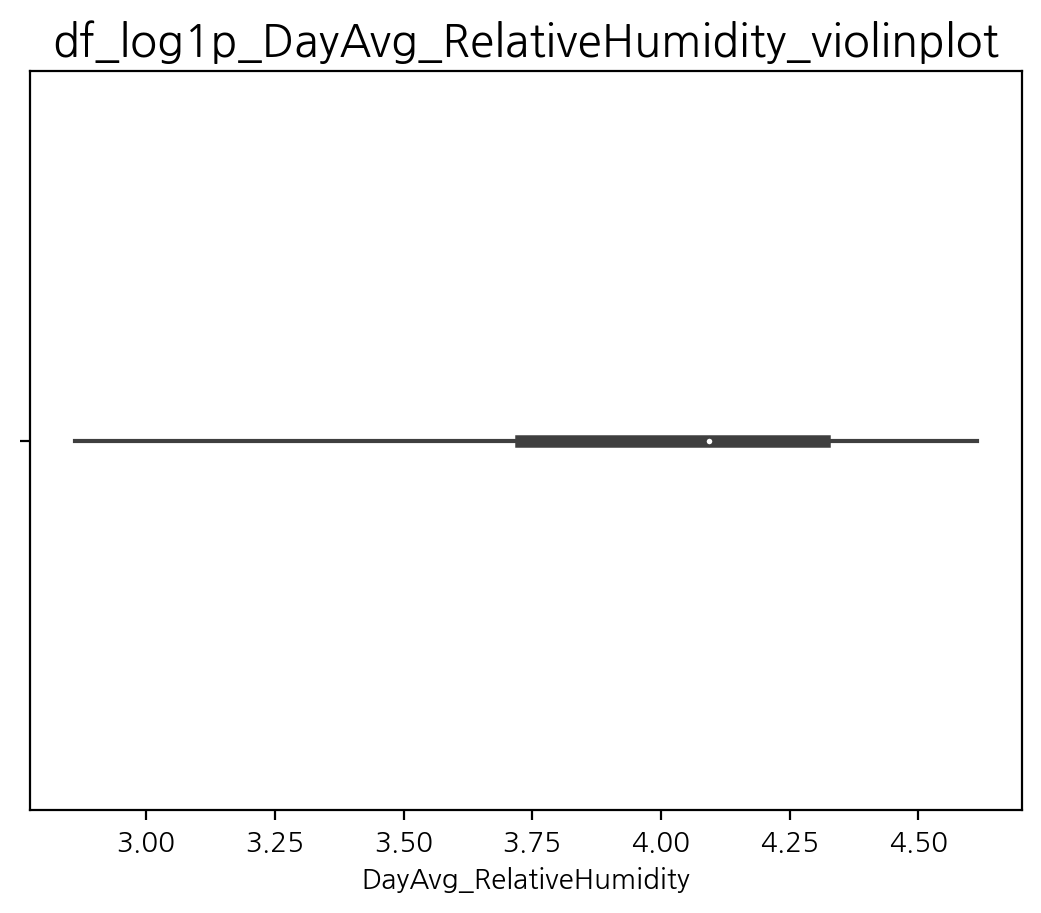

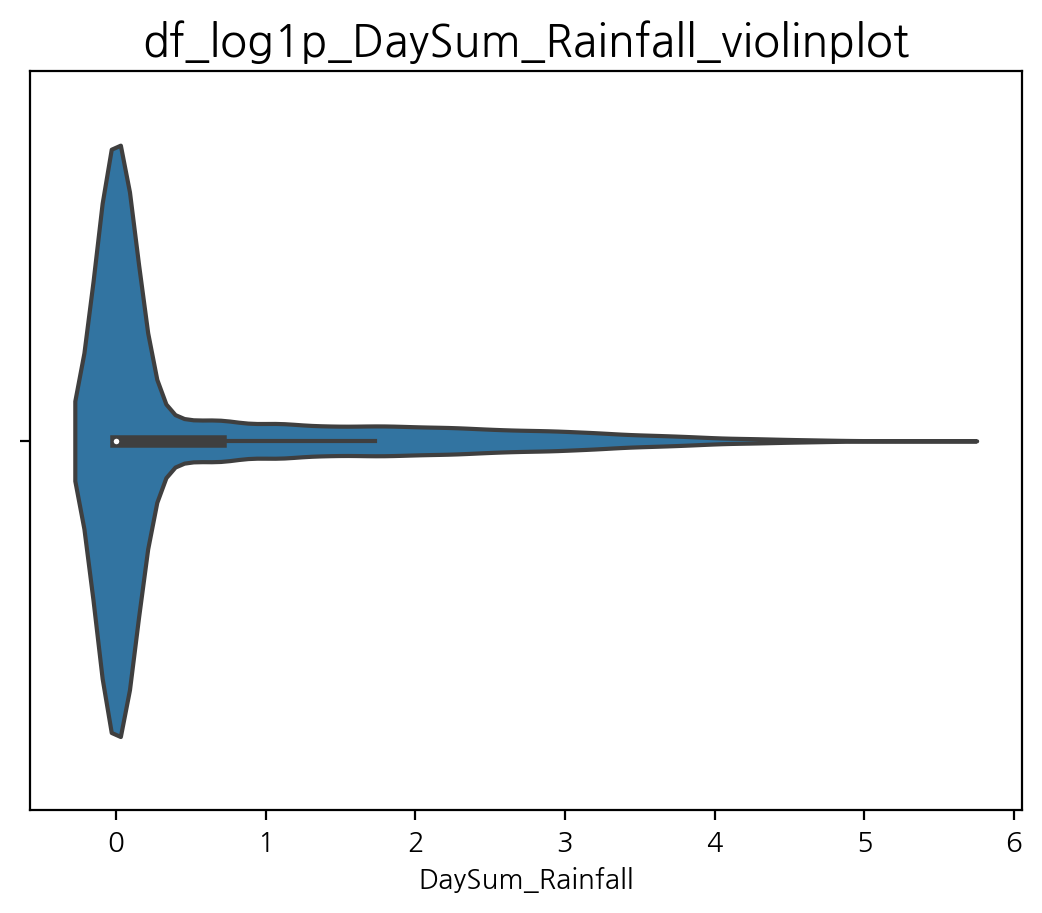

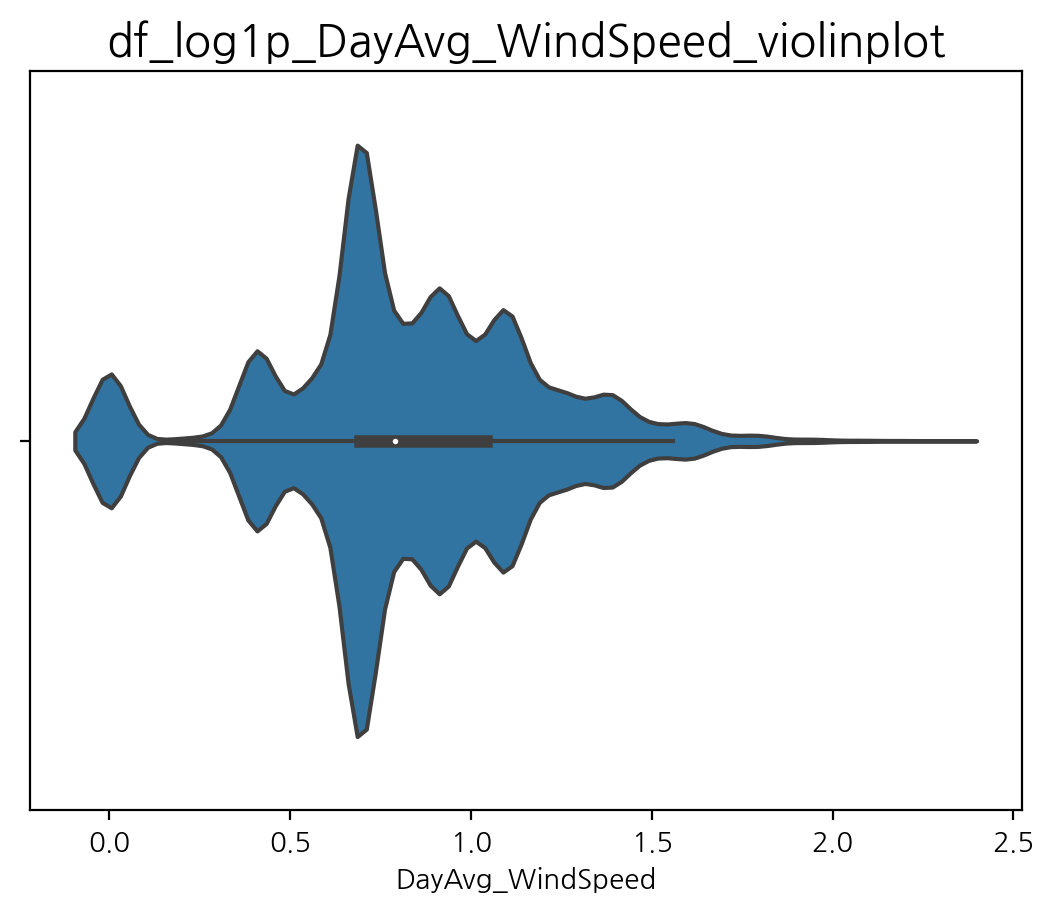

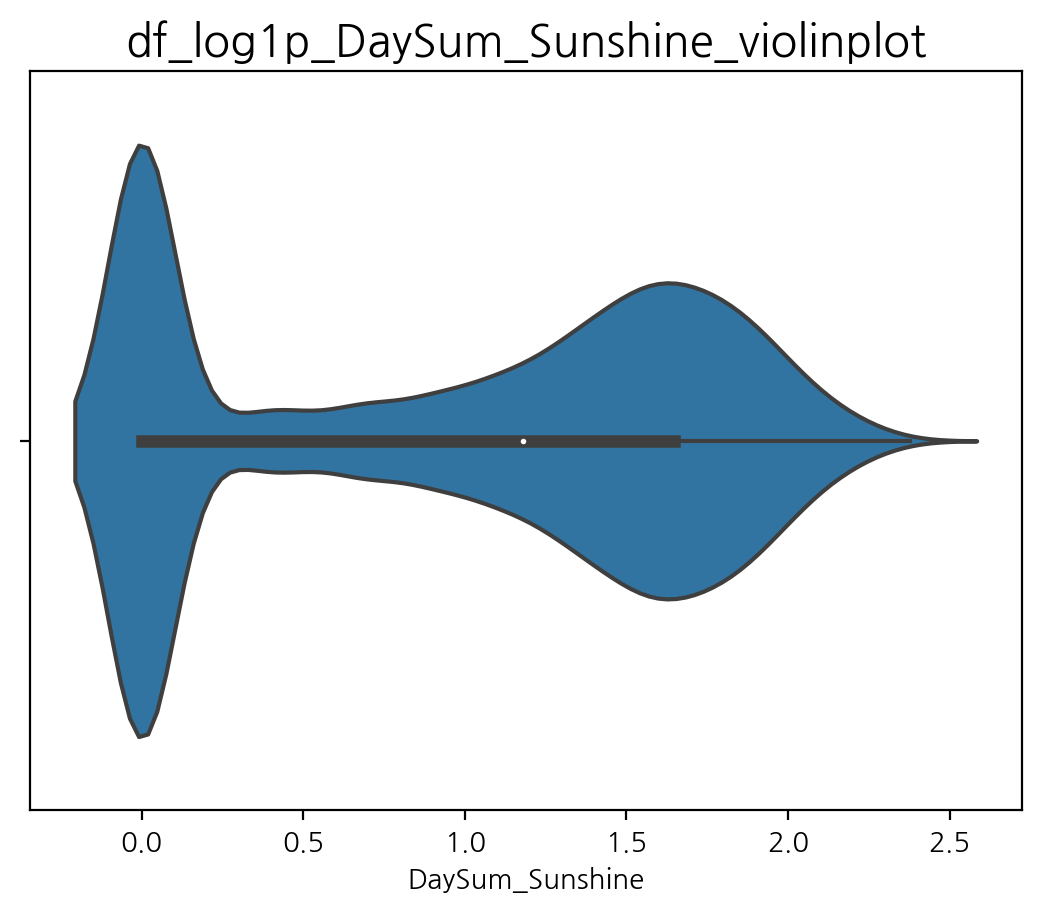

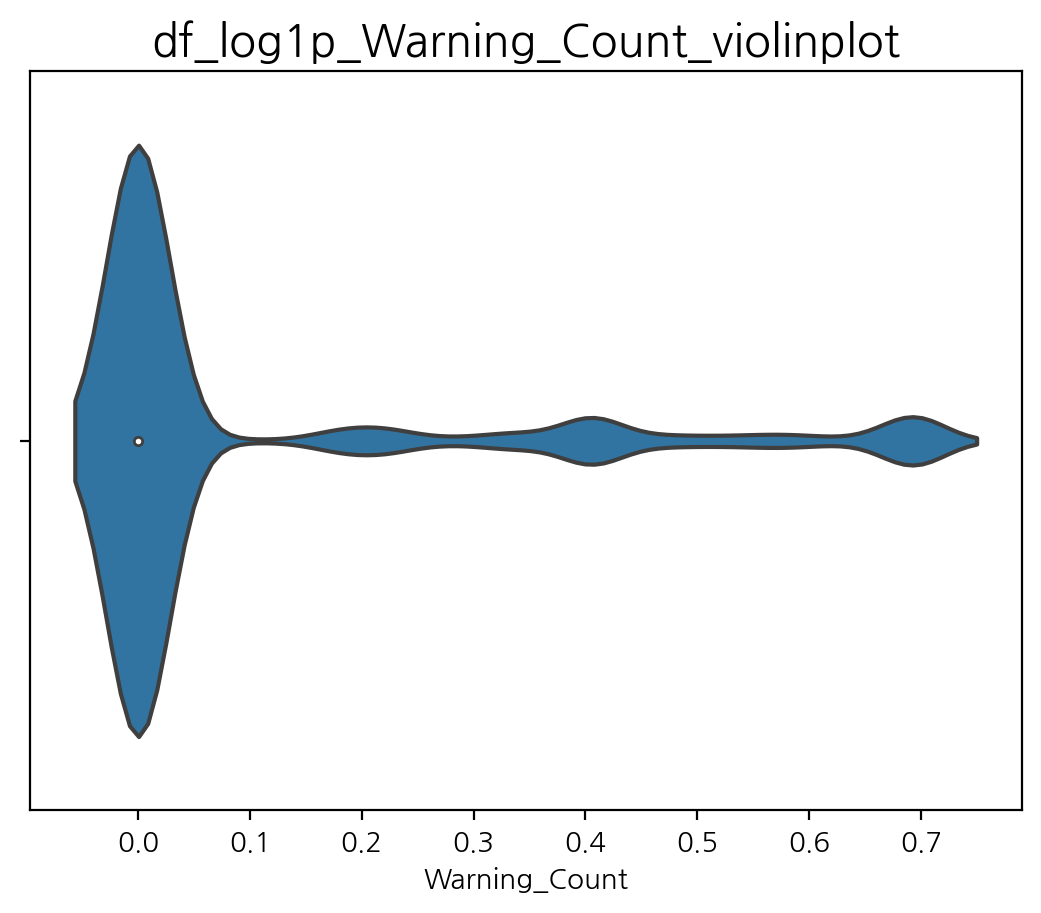

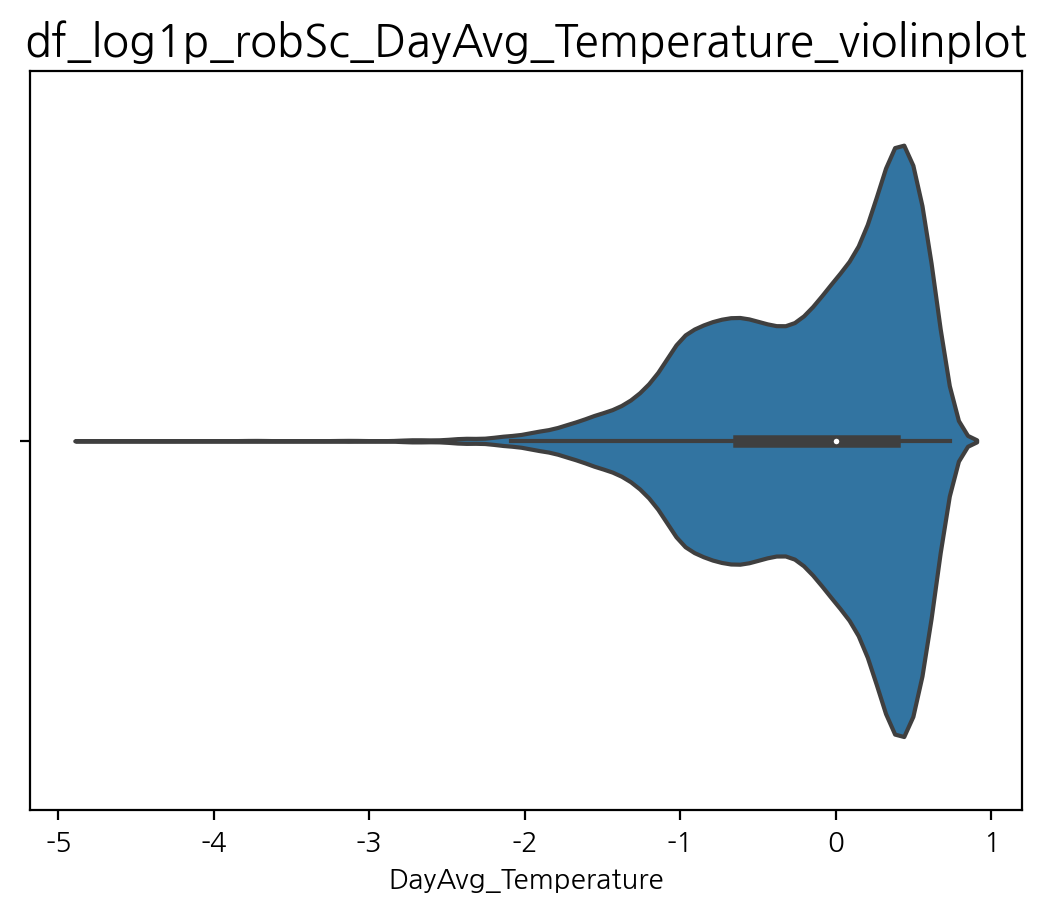

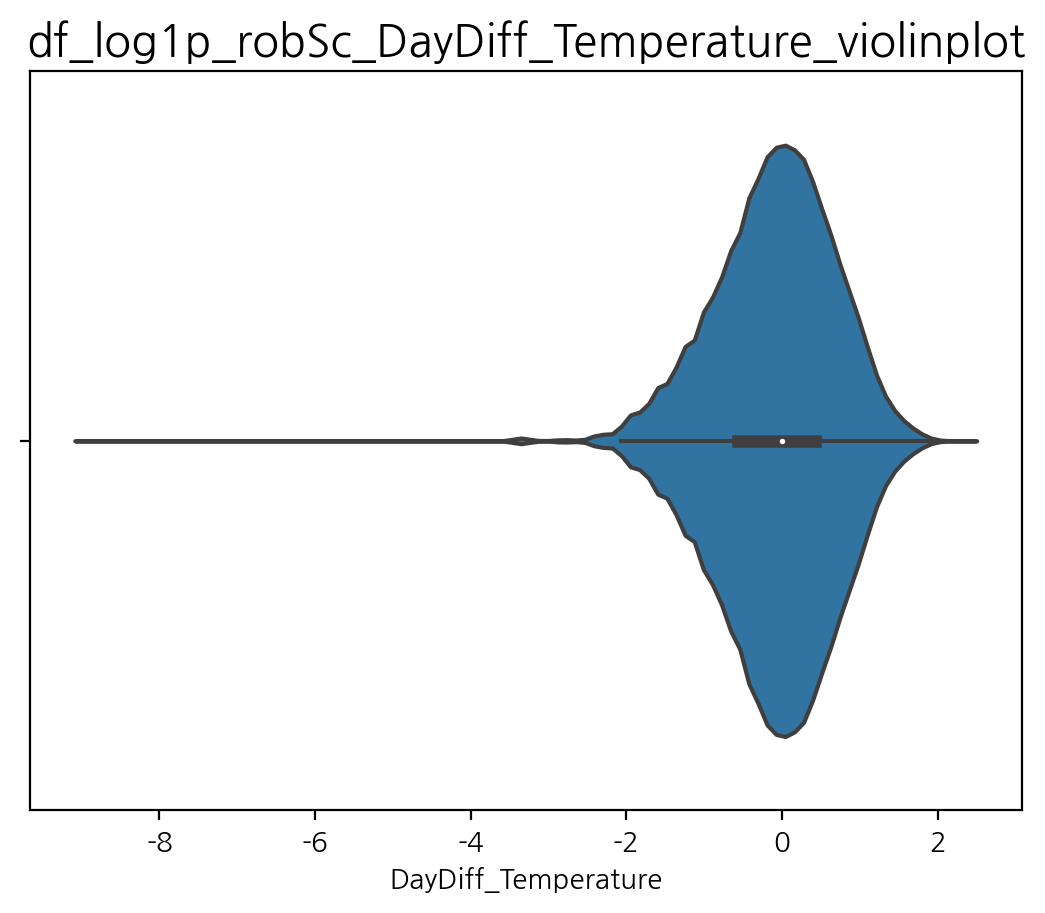

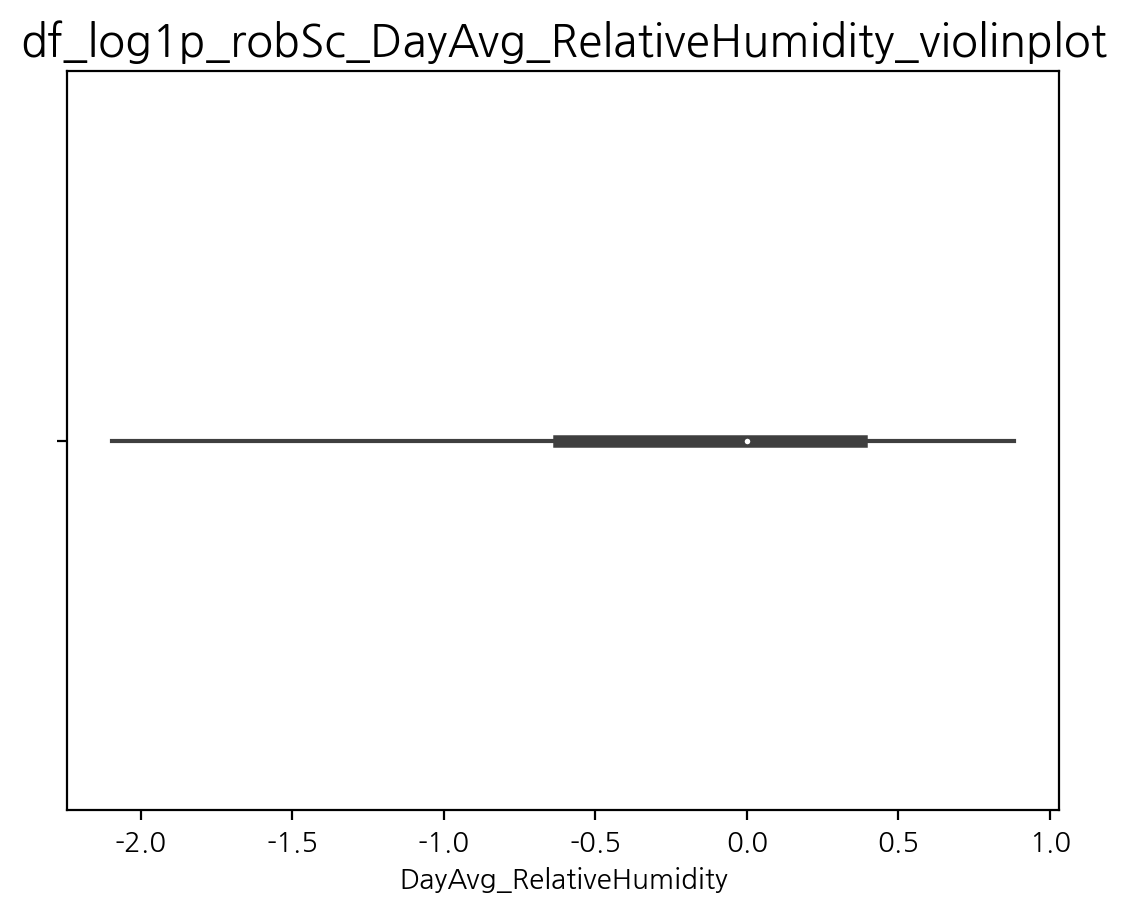

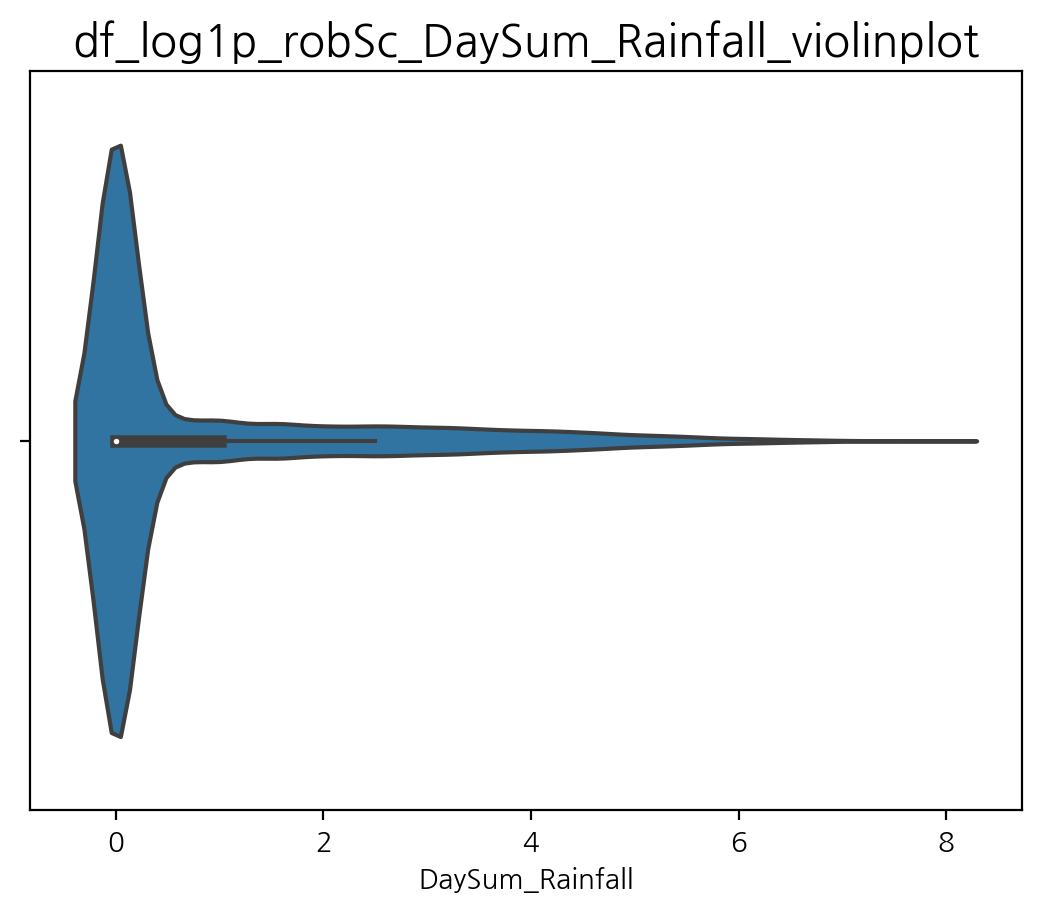

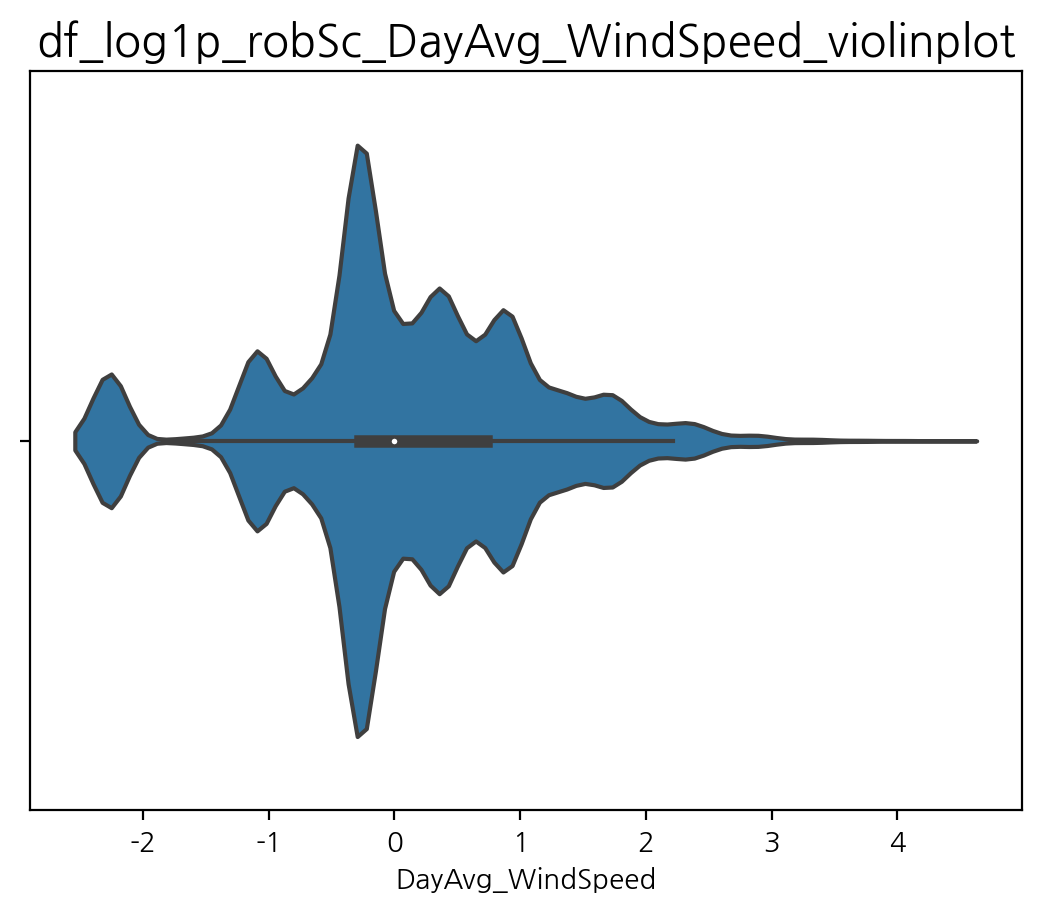

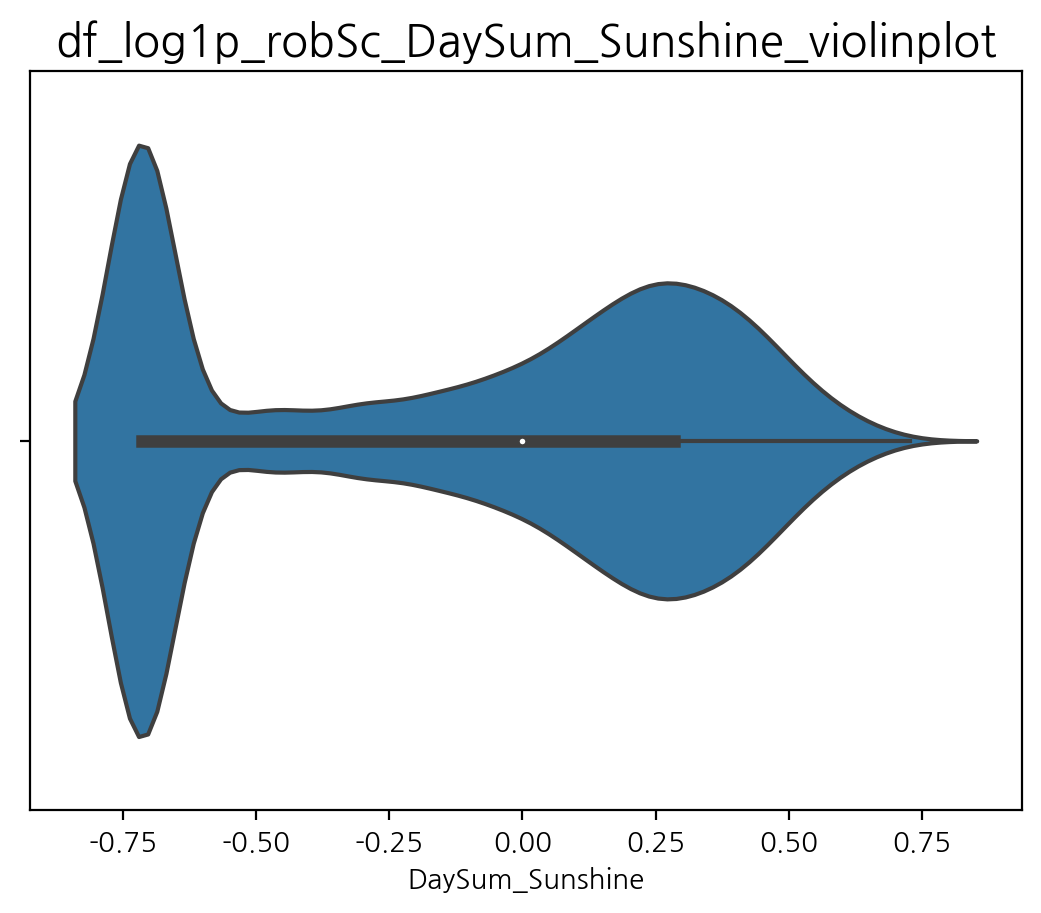

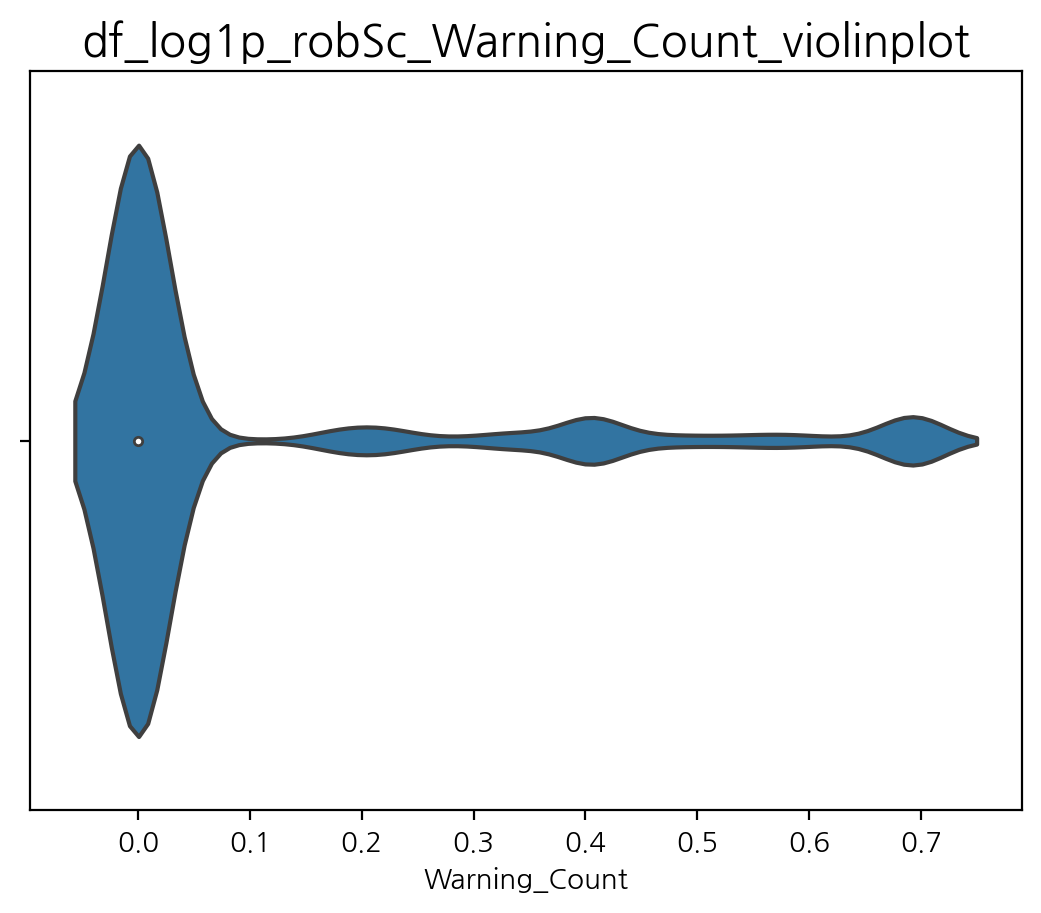

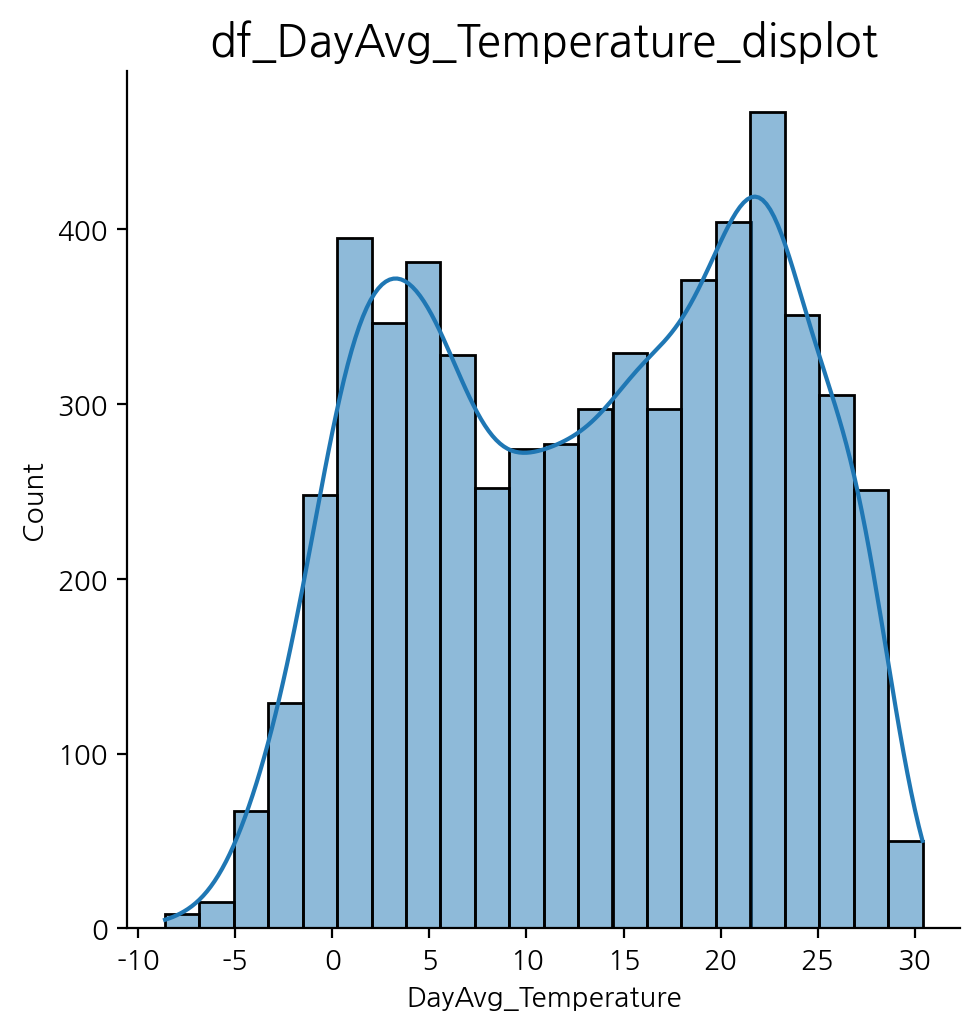

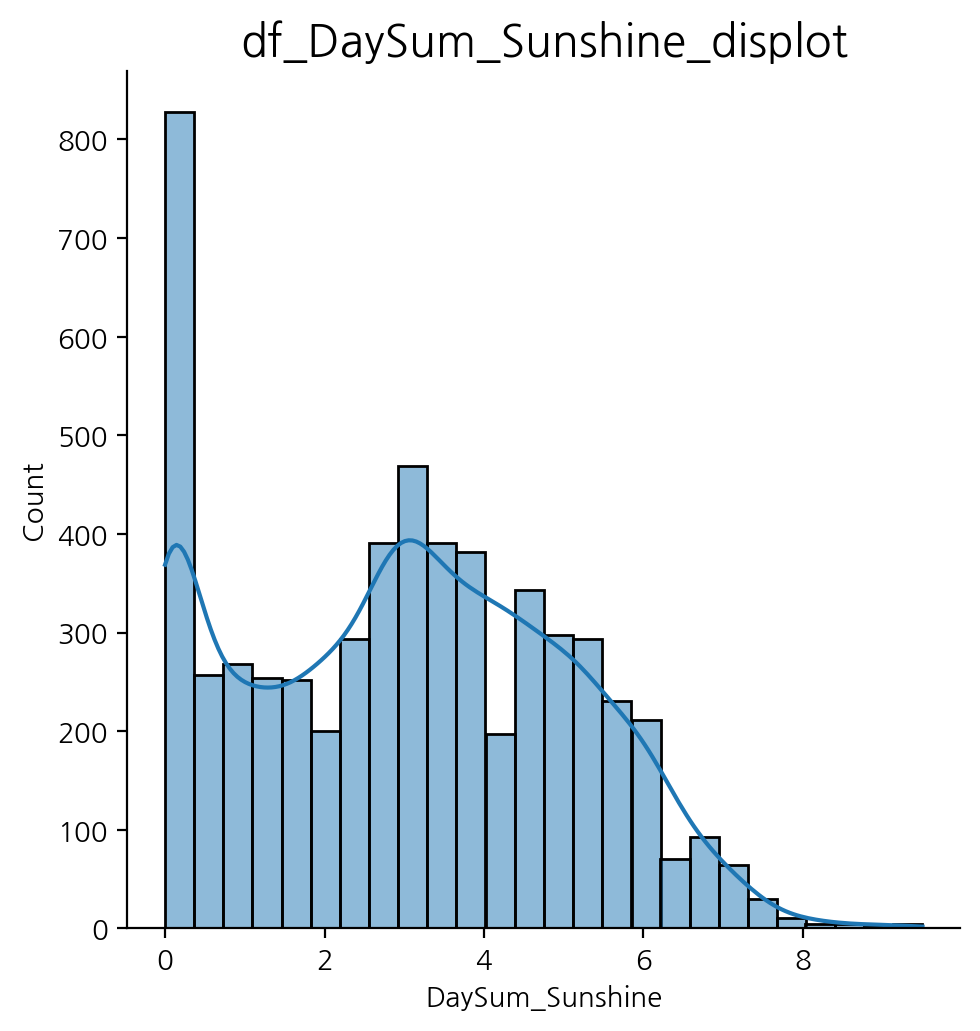

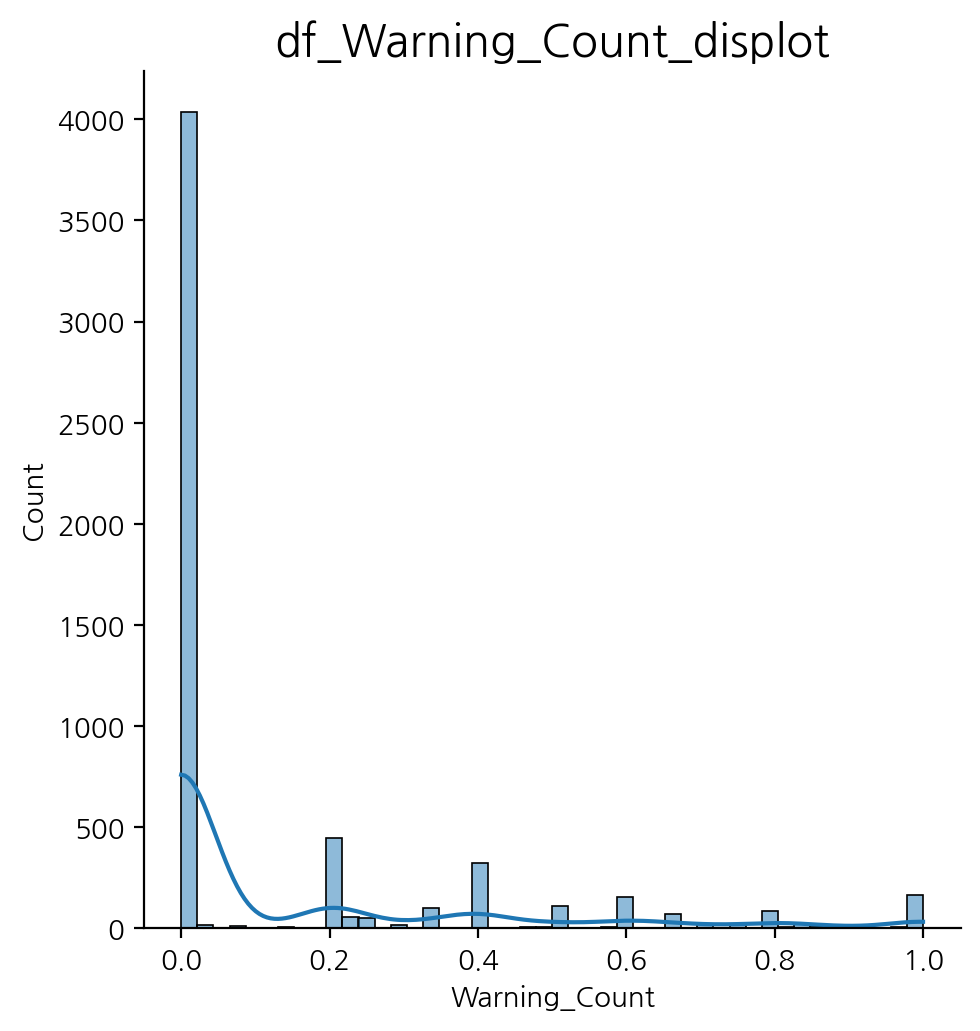

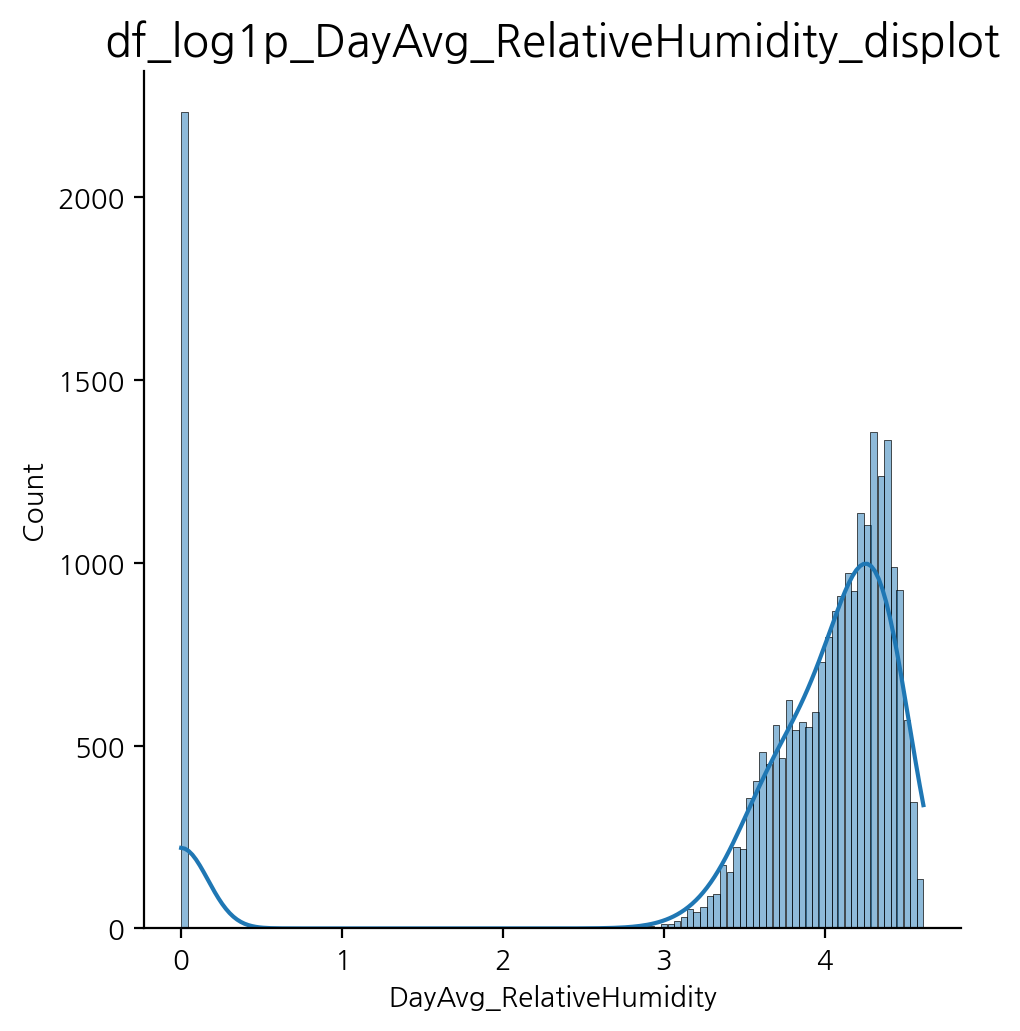

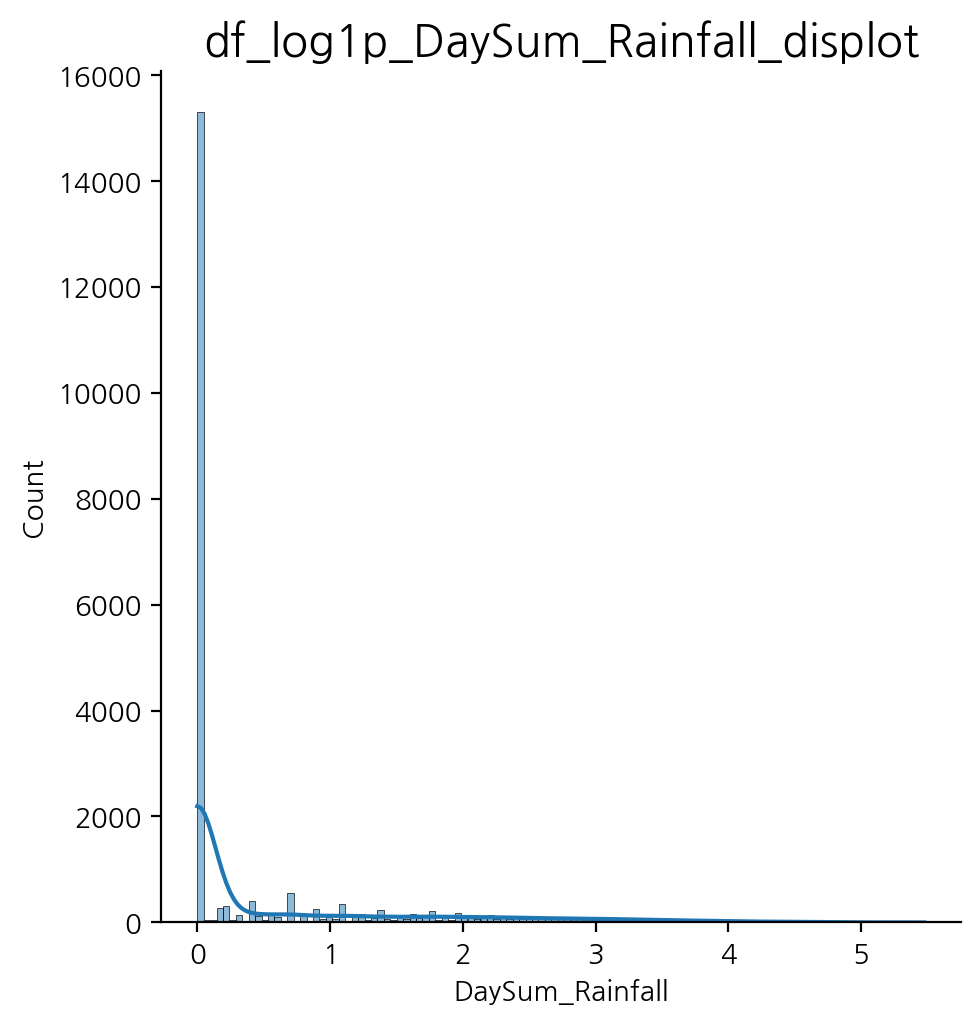

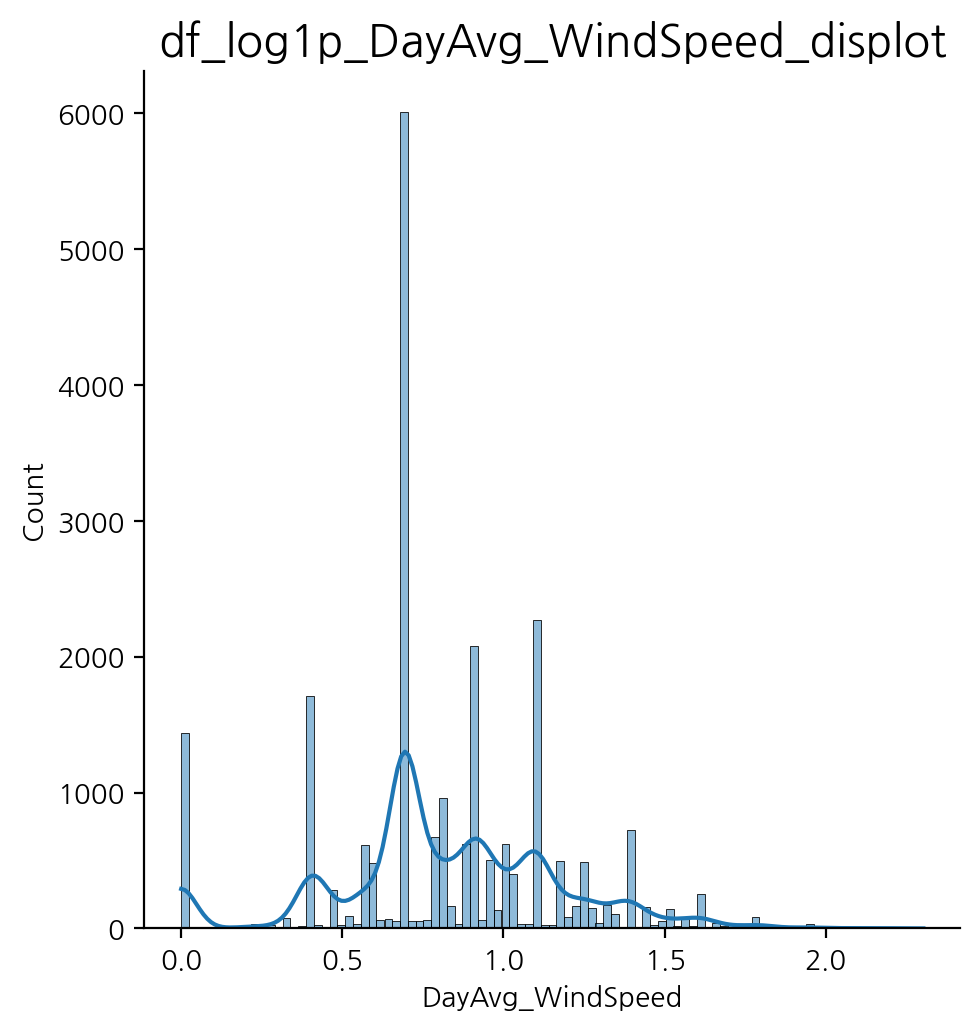

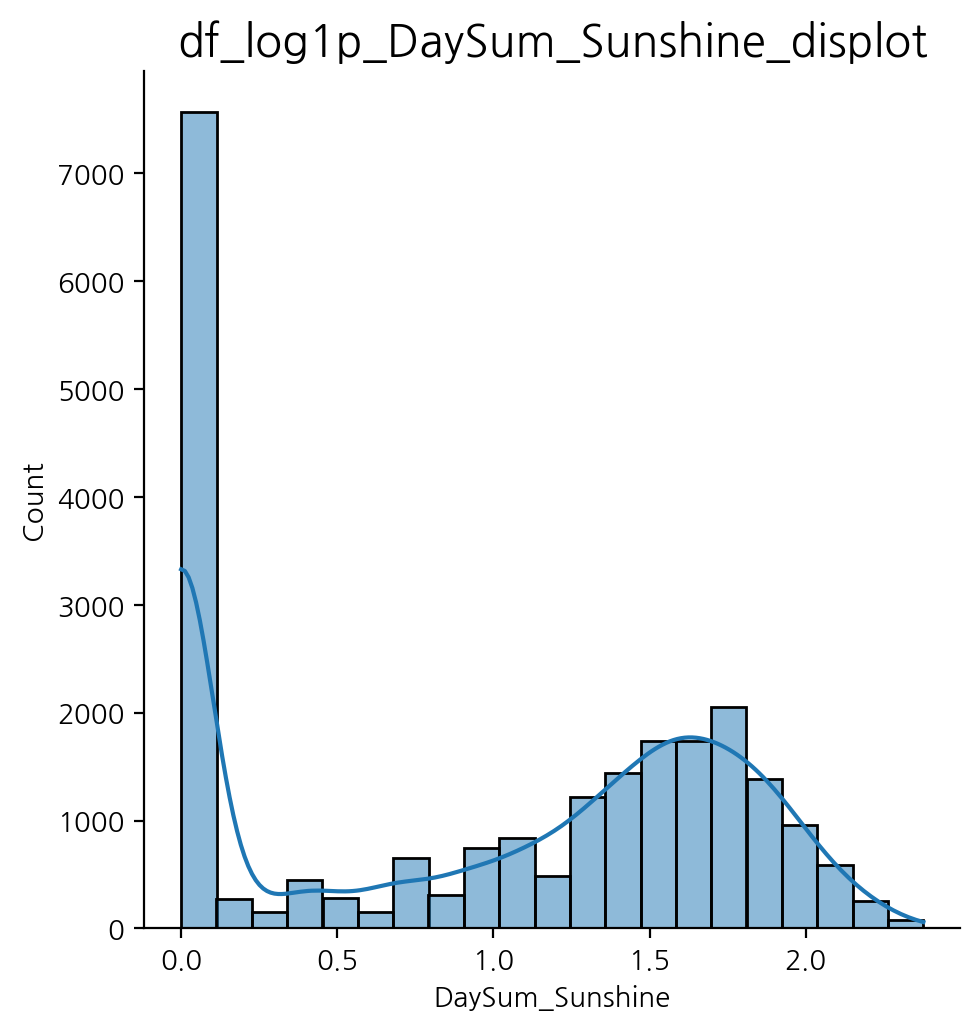

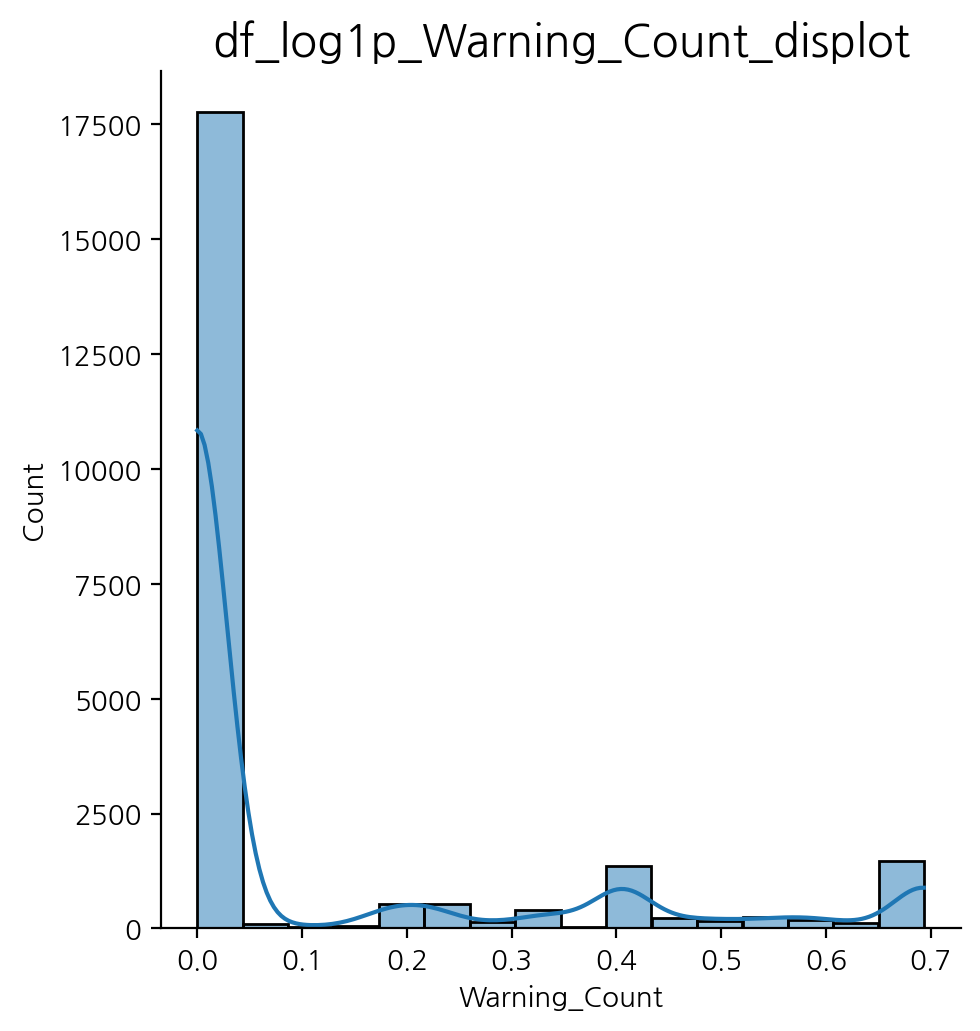

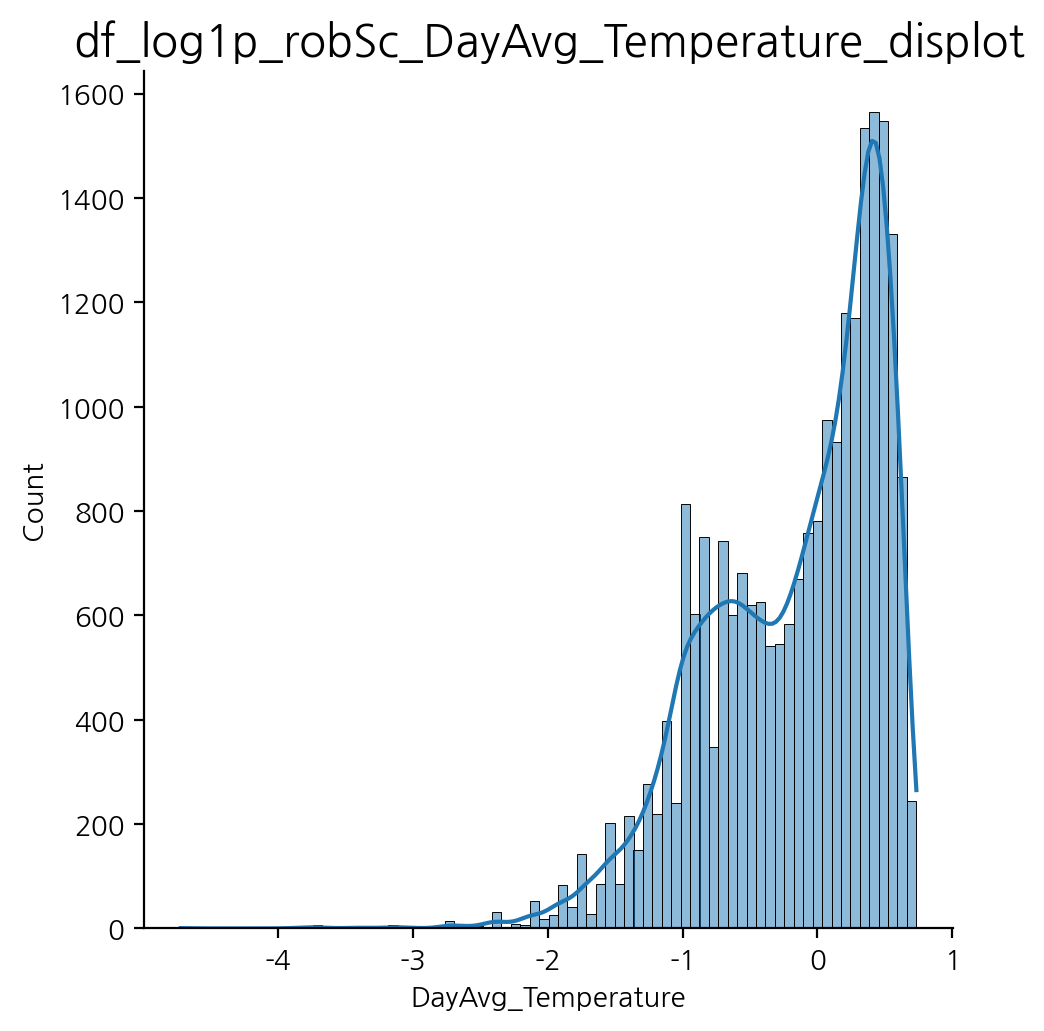

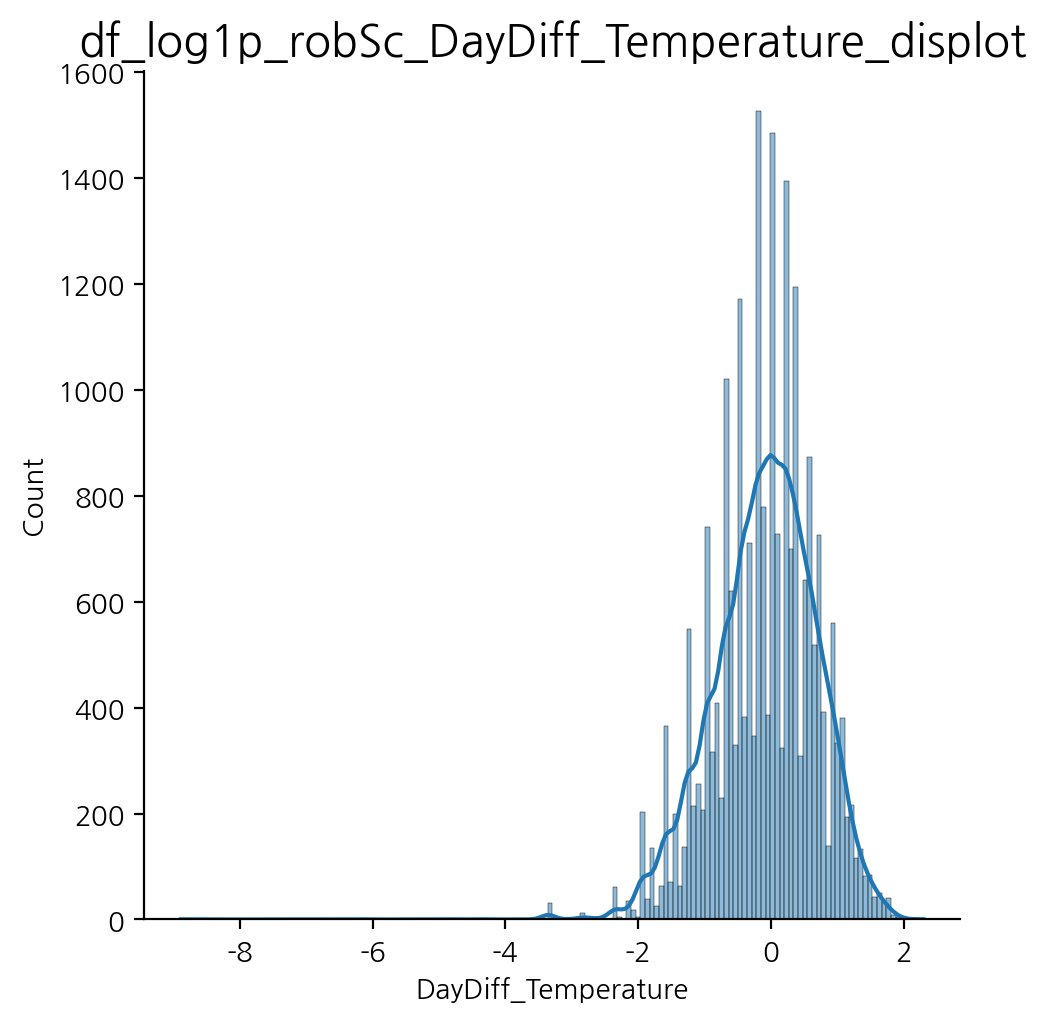

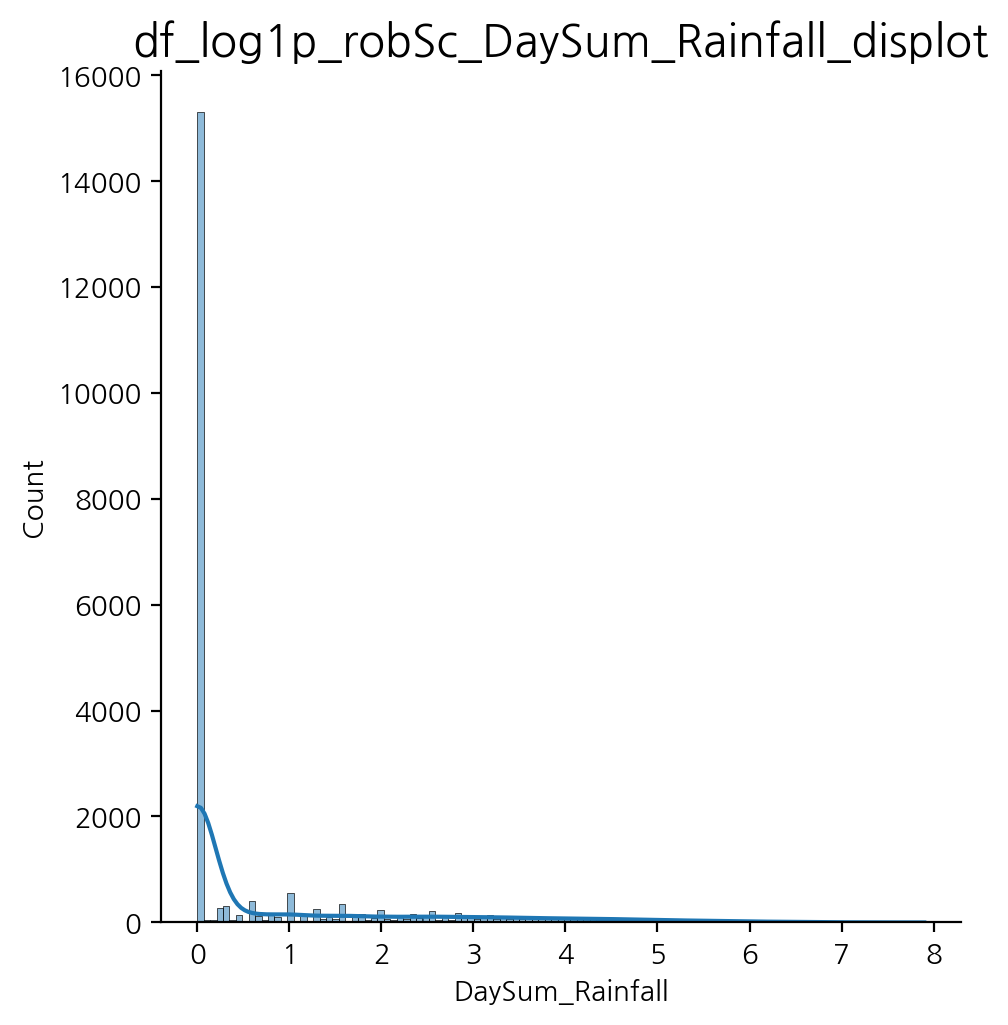

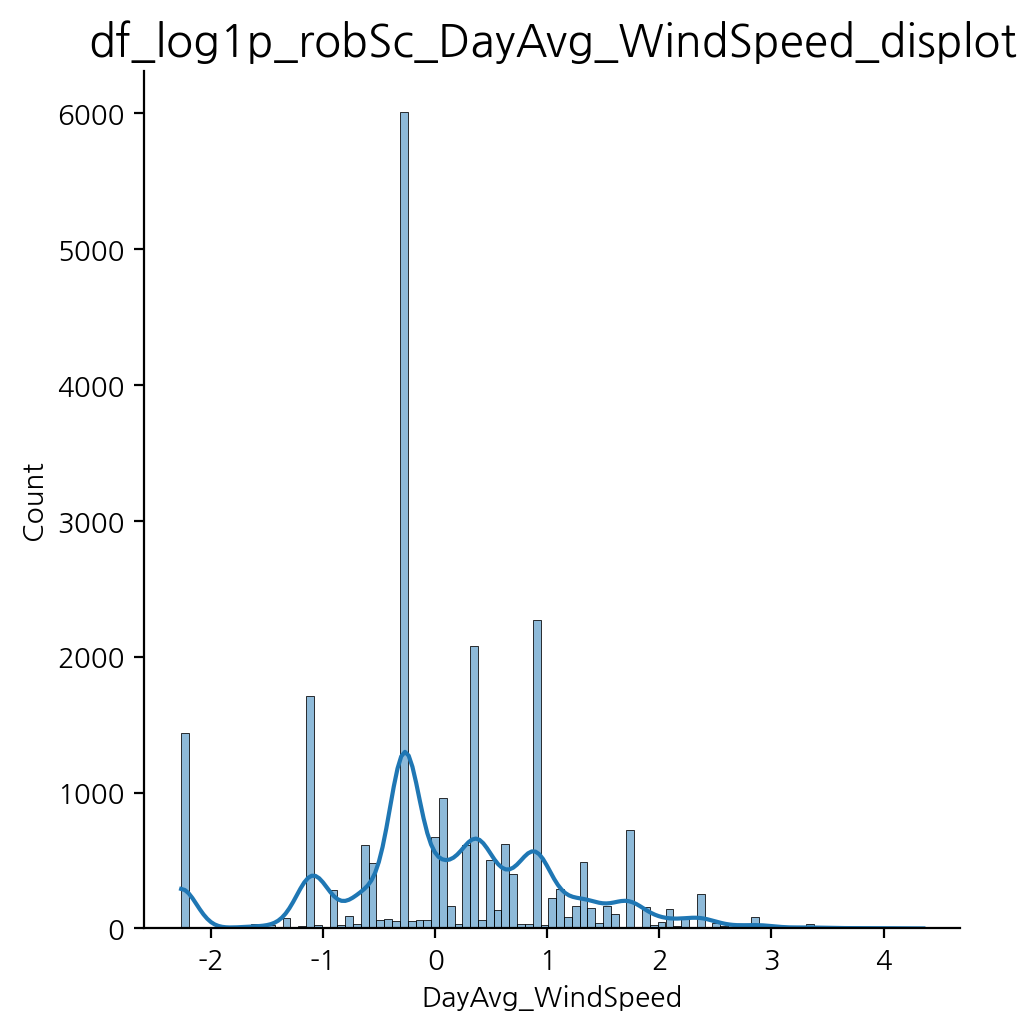

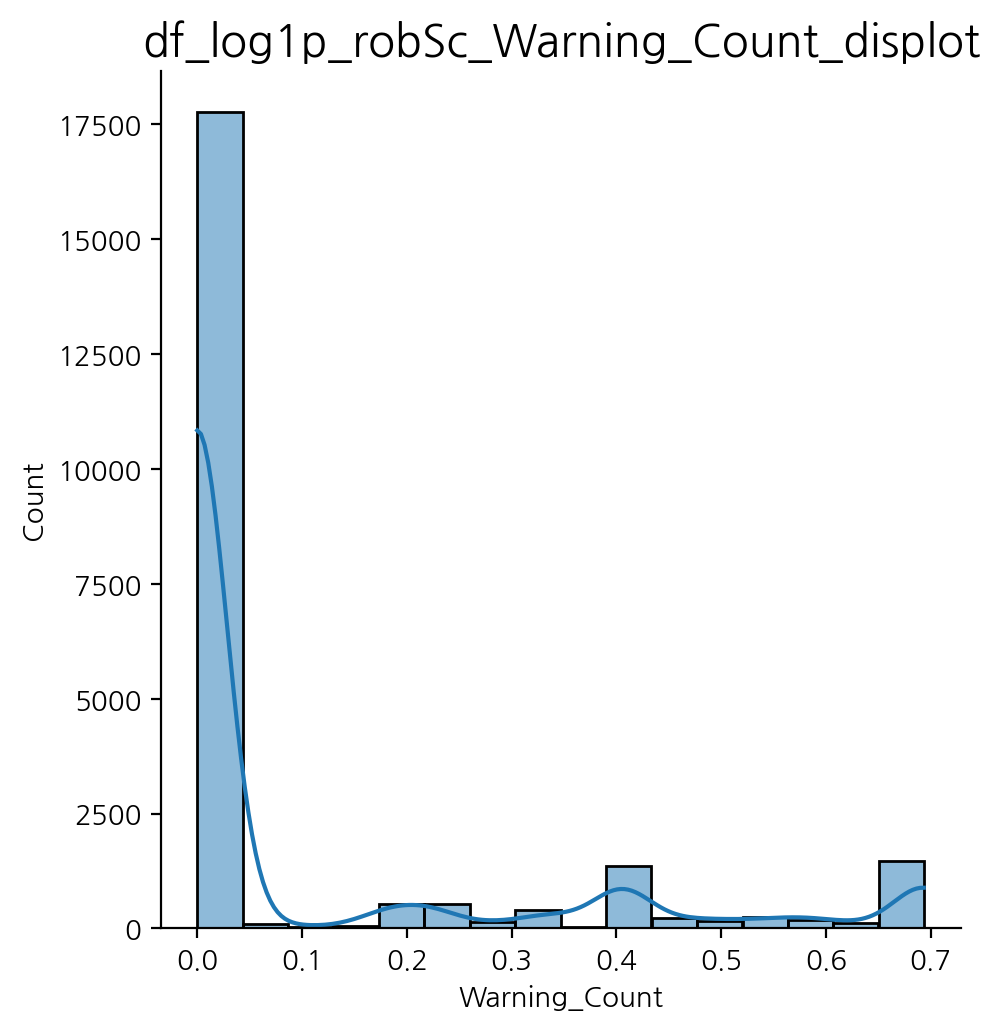

In [5]:
ead.uv()



┌▣ df.corr() ---- ---- ---- ----


DayAvg_Temperature  DayDiff_Temperature  \
DayAvg_Temperature                    1.000               -0.043   
DayDiff_Temperature                  -0.043                1.000   
DayAvg_RelativeHumidity               0.300               -0.241   
DaySum_Rainfall                       0.235               -0.372   
DayAvg_WindSpeed                     -0.279               -0.294   
DaySum_Sunshine                       0.058                0.665   
Warning_Count                         0.085               -0.113   

                         DayAvg_RelativeHumidity  DaySum_Rainfall  \
DayAvg_Temperature                         0.300            0.235   
DayDiff_Temperature                       -0.241           -0.372   
DayAvg_RelativeHumidity                    1.000            0.257   
DaySum_Rainfall                            0.257            1.000   
DayAvg_WindSpeed                          -0.103            0.119   
DaySum_Sunshine                           -0.300           -0.361   
Warning_Count                              0.259            0.209   

                         DayAvg_WindSpeed  DaySum_Sunshine  Warning_Count  
DayAvg_Temperature                 -0.279            0.058          0.085  
DayDiff_Temperature                -0.294            0.665         -0.113  
DayAvg_RelativeHumidity            -0.103           -0.300          0.259  
DaySum_Rainfall                     0.119           -0.361          0.209  
DayAvg_WindSpeed                    1.000           -0.053          0.281  
DaySum_Sunshine                    -0.053            1.000          0.056  
Warning_Count                       0.281            0.056          1.000



┌▣ sns.heatmap(data=df.corr(), annot=True, fmt=".2f") ---- ---- ---- ----


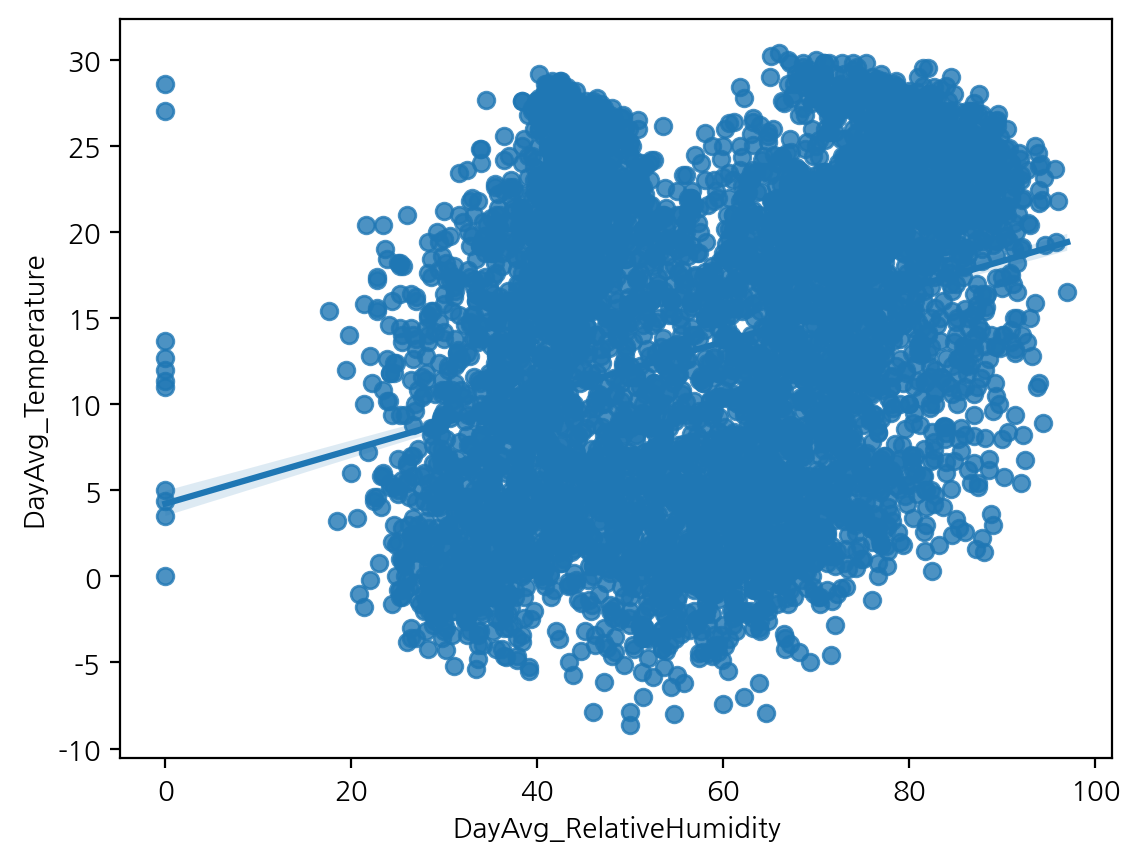

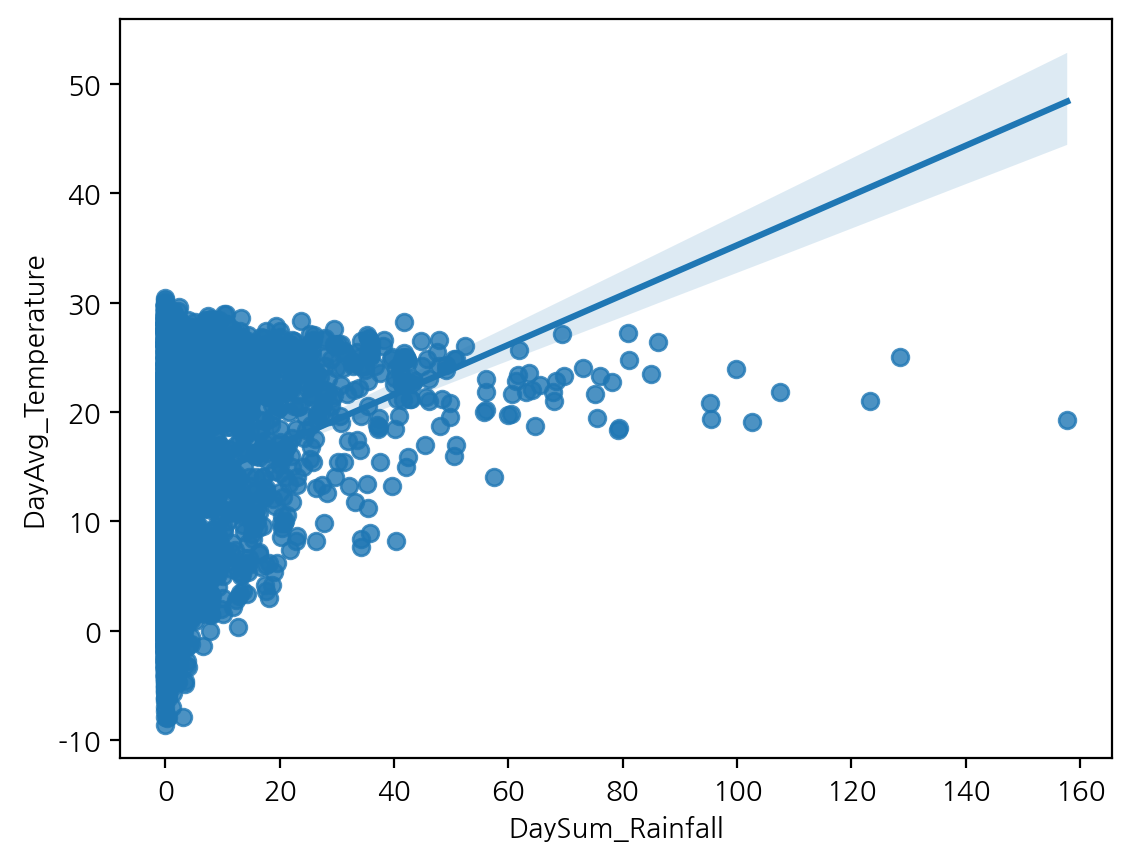

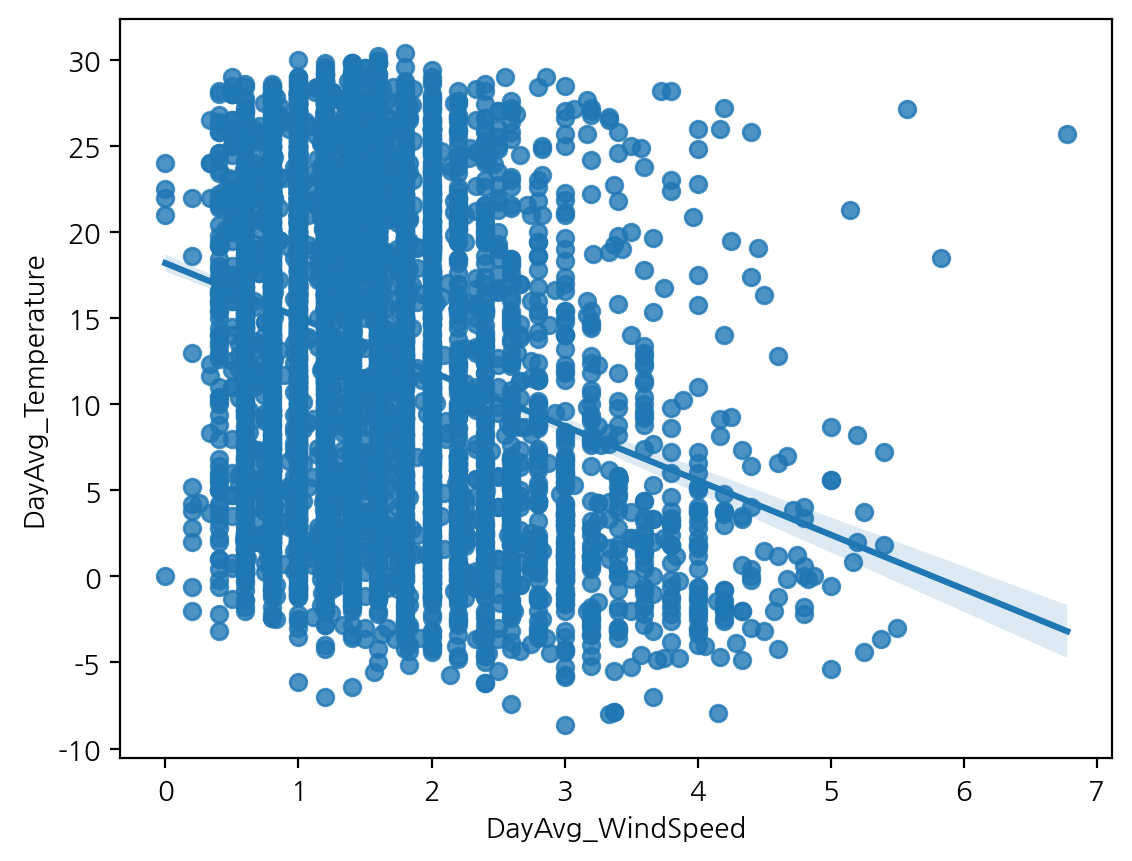

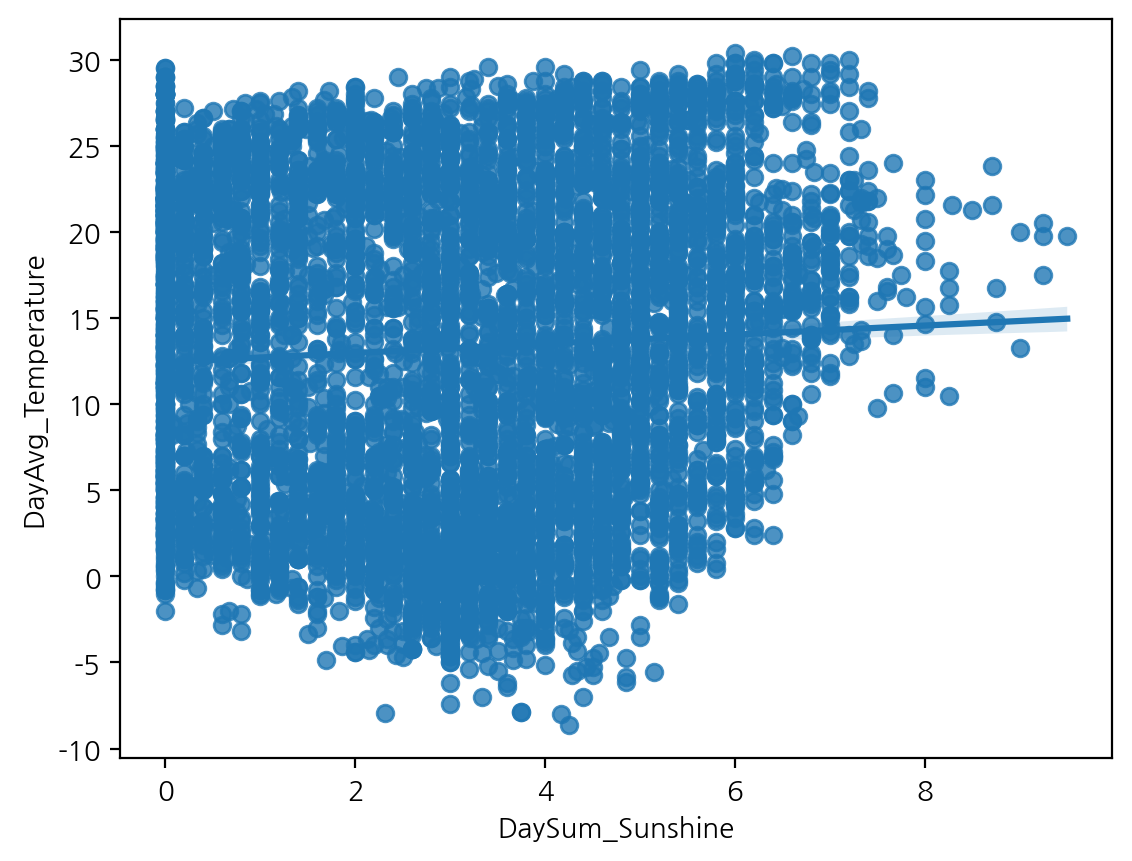

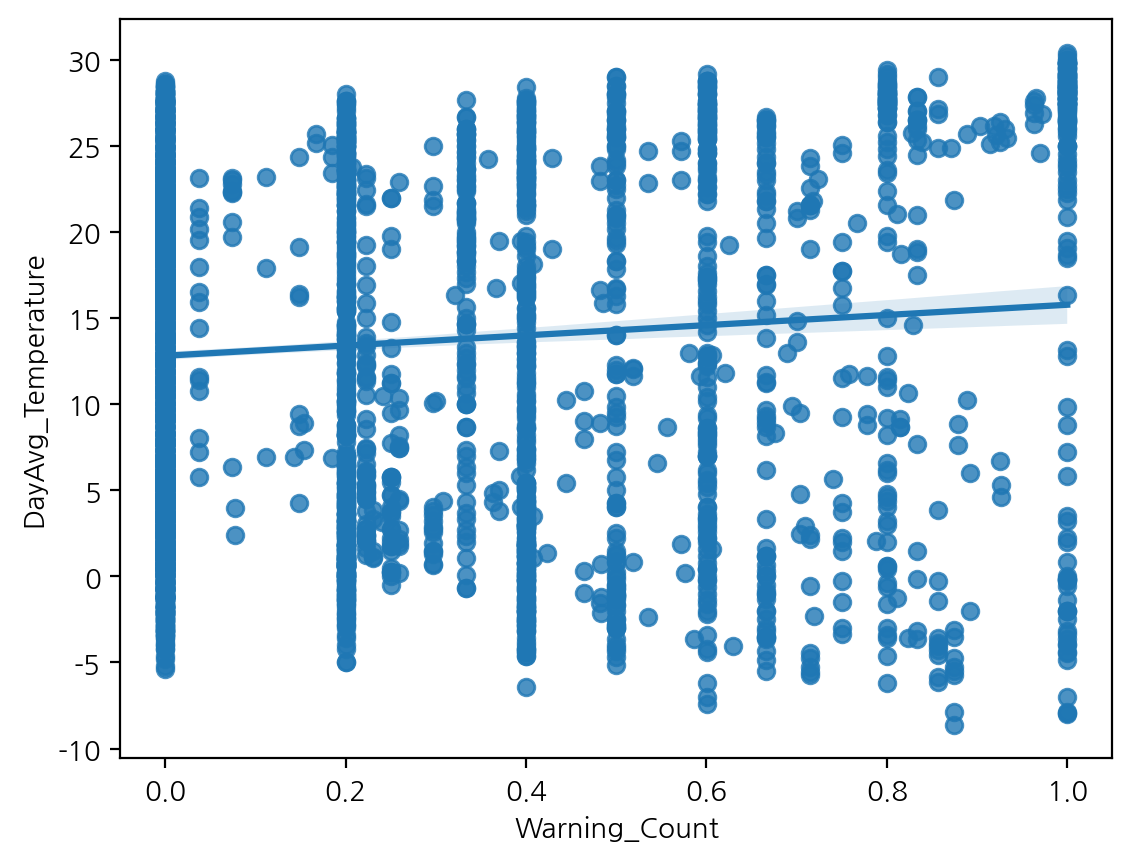

In [6]:
ead.mv()